# SACHIN SINGH

## Problem Statement

The Problem is to find the Prices of the houses in King Country. So the Target variable here is Price.

## Importing the required libraries

In [1]:
# Importing the required libraries
import numpy as np                      
import pandas as pd    

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# visualization
import matplotlib.pyplot as plt                         
import seaborn as sns 
%matplotlib inline


from sklearn.neighbors import KNeighborsRegressor       
from sklearn.model_selection import cross_val_score      
from sklearn.tree import DecisionTreeRegressor           
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import statsmodels.api as sm

import os

## Reading Data

In [4]:
# Set the working directory and reading the data
import os
os.chdir("C:\\Users\\sai\\Desktop\\PRAXIS\\IML PROJECT")
data = pd.read_csv('kc_house_train_data.csv')
data.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875  20141209T000000   604000.0         4       3.00         1960   
1  7237550310  20140512T000000  1225000.0         4       4.50         5420   
2  9212900260  20140527T000000   468000.0         2       1.00         1160   
3   114101516  20140528T000000   310000.0         3       1.00         1430   
4  6054650070  20141007T000000   400000.0         3       1.75         1370   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5000     1.0           0     0  ...      7        1050            910   
1    101930     1.0           0     0  ...     11        3890           1530   
2      6000     1.0           0     0  ...      7         860            300   
3     19901     1.5           0     0  ...      7        1430              0   
4      9680     1.0           0     0  ...      7        1370              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1965             0    98136  47.5208 -122.393           1360   
1      2001             0    98053  47.6561 -122.005           4760   
2      1942             0    98115  47.6900 -122.292           1330   
3      1927             0    98028  47.7558 -122.229           1780   
4      1977             0    98074  47.6127 -122.045           1370   

   sqft_lot15  
0        5000  
1      101930  
2        6000  
3       12697  
4       10208  

[5 rows x 21 columns]

## 1) Questioning the data

In [5]:
# Finding the  No.of columns and rows present in data .

data.shape     # 9761 rows and 21 columns

(9761, 21)

In [6]:
# Finding the info of data like data type of columns, column names etc

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [7]:
# Checking for Null Values
data.isnull().sum()

# The data has no null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Description of each Feature

id:      Unique ID for each home sold
    
date:    Date of the home sale
    
price:   Price of each home sold
    
bedrooms:     Number of bedrooms
    
bathrooms:    Number of bathrooms
    
sqft_living:  Square footage of the apartments interior living space
    
sqft_lot:     Square footage of the land space
    
floors:       Number of floors
    
waterfront: - A variable for whether the apartment was overlooking the waterfront or not
    
view:         An index of how good the view of the property was
    
condition: -  An index on the condition of the apartment,
    
grade:        An index on grade og the appartment with 13 being highest and 1 being lowest.
    
sqft_above:       The square footage of the interior housing space that is above ground level
    
sqft_basement:    The square footage of the interior housing space that is below ground level
    
yr_built:         The year the house was initially built
    
yr_renovated:     The year of the house’s last renovation
    
zipcode:          What zipcode area the house is in
    
lat:              Lattitude
    
long:             Longitude
    
sqft_living15:    according to 2015 data,the square footage of the apartments interior living space

sqft_lot15:       according to 2015 data, Square footage of the land space neighbors

## 1) Hypothesis


**id :** Does not impact. - **true**

**date(Sale date) :** If sale date itself is considered , it might not effect. But it can impact by finding the age of the building(using yr_built and yr_renovated), Age increases price decreases.  **As expected age is making a slight impact**

**bedrooms :** If number of bedrooms increases, price will increase.  **Bedrooms is having a slight impact**

**bathrooms :** If number of bathrooms increases, price will increase.**Bathrooms is having a slight impact**

**sqft_living (sqft_above + sqft_basement):** If sqft_living increases, price will increase.**sqft_living has a huge impact as expected**

**sqft_lot :**  If sqft_lot increases, price will increase. **This variable is not effecting**

**floors :** Number of floors might not impact the price.  **Floors is having a slight impact**

**waterfront(houses beside waterbodies like lakes ,ponds) :** May not impact the price. **Water front is impacting**

**view :** No of views increases price will increase **Number to views is also impacting**

**condition :** price increases with increase in condition. **condition is not making a huge difference**

**grade :** construction quality might impact. **This is making a huge impact**

**sqft_above :** price increases when sqft_above increases. **This is making an impact but this holds multicollinearity with sqft_living**

**sqft_basement :** price increases with increase in sqft_basement. **This is impacting but this also holds collinearity with sqft_living so it is ignored**

**yr_built :** with increase in yr_built price increases. **This is as expected impacting the price when age is calculated.**

**yr_renovated :** If a house is renovated it will cost more **This is as expected impacting the price when age is calculated.**

**zipcode :** price varies with zipcode. **price is varied with zipcode**

**lat	long :** price varies with position of the property. **price is heavily impacted with lat and long**

**sqft_living15(sqft_living in 2015) :** If sqft_living15 increases price increases **This is impacting but this also holds collinearity with sqft_living so it is ignored**

**sqft_lot15(sqft_lot15 in 2015) :**  If sqft_lot15 increases price increases **This variable is not effecting**

EDA
-------------------------------------------
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.


In [9]:
# Finding the Summary of Data  like mean, median,standard deviation etc.
data.describe().transpose()

count          mean           std           min           25%  \
id             9761.0  4.605288e+09  2.876044e+09  1.200019e+06  2.126049e+09   
price          9761.0  5.427350e+05  3.795276e+05  8.000000e+04  3.200000e+05   
bedrooms       9761.0  3.375884e+00  9.606971e-01  0.000000e+00  3.000000e+00   
bathrooms      9761.0  2.117175e+00  7.739710e-01  0.000000e+00  1.750000e+00   
sqft_living    9761.0  2.086734e+03  9.271943e+02  2.900000e+02  1.420000e+03   
sqft_lot       9761.0  1.521526e+04  4.126673e+04  5.200000e+02  5.100000e+03   
floors         9761.0  1.486067e+00  5.323168e-01  1.000000e+00  1.000000e+00   
waterfront     9761.0  8.400779e-03  9.127464e-02  0.000000e+00  0.000000e+00   
view           9761.0  2.480279e-01  7.878772e-01  0.000000e+00  0.000000e+00   
condition      9761.0  3.415531e+00  6.505519e-01  1.000000e+00  3.000000e+00   
grade          9761.0  7.661510e+00  1.182680e+00  1.000000e+00  7.000000e+00   
sqft_above     9761.0  1.793291e+03  8.357638e+02  2.900000e+02  1.190000e+03   
sqft_basement  9761.0  2.934430e+02  4.426127e+02  0.000000e+00  0.000000e+00   
yr_built       9761.0  1.970800e+03  2.924001e+01  1.900000e+03  1.951000e+03   
yr_renovated   9761.0  8.606659e+01  4.054174e+02  0.000000e+00  0.000000e+00   
zipcode        9761.0  9.807779e+04  5.320359e+01  9.800100e+04  9.803300e+04   
lat            9761.0  4.756005e+01  1.402359e-01  4.715590e+01  4.746780e+01   
long           9761.0 -1.222143e+02  1.398945e-01 -1.225140e+02 -1.223270e+02   
sqft_living15  9761.0  1.992360e+03  6.873222e+02  6.200000e+02  1.490000e+03   
sqft_lot15     9761.0  1.282479e+04  2.651834e+04  6.600000e+02  5.160000e+03   

                        50%           75%           max  
id             3.905041e+09  7.338403e+09  9.900000e+09  
price          4.500000e+05  6.490000e+05  7.700000e+06  
bedrooms       3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.910000e+03  2.570000e+03  1.205000e+04  
sqft_lot       7.642000e+03  1.066000e+04  1.651359e+06  
floors         1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.570000e+03  2.230000e+03  8.860000e+03  
sqft_basement  0.000000e+00  5.700000e+02  3.480000e+03  
yr_built       1.975000e+03  1.996000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.806500e+04  9.811700e+04  9.819900e+04  
lat            4.757220e+01  4.768040e+01  4.777760e+01  
long          -1.222290e+02 -1.221260e+02 -1.213190e+02  
sqft_living15  1.840000e+03  2.370000e+03  5.790000e+03  
sqft_lot15     7.660000e+03  1.011300e+04  5.606170e+05

## Checking for Linear Realtionship

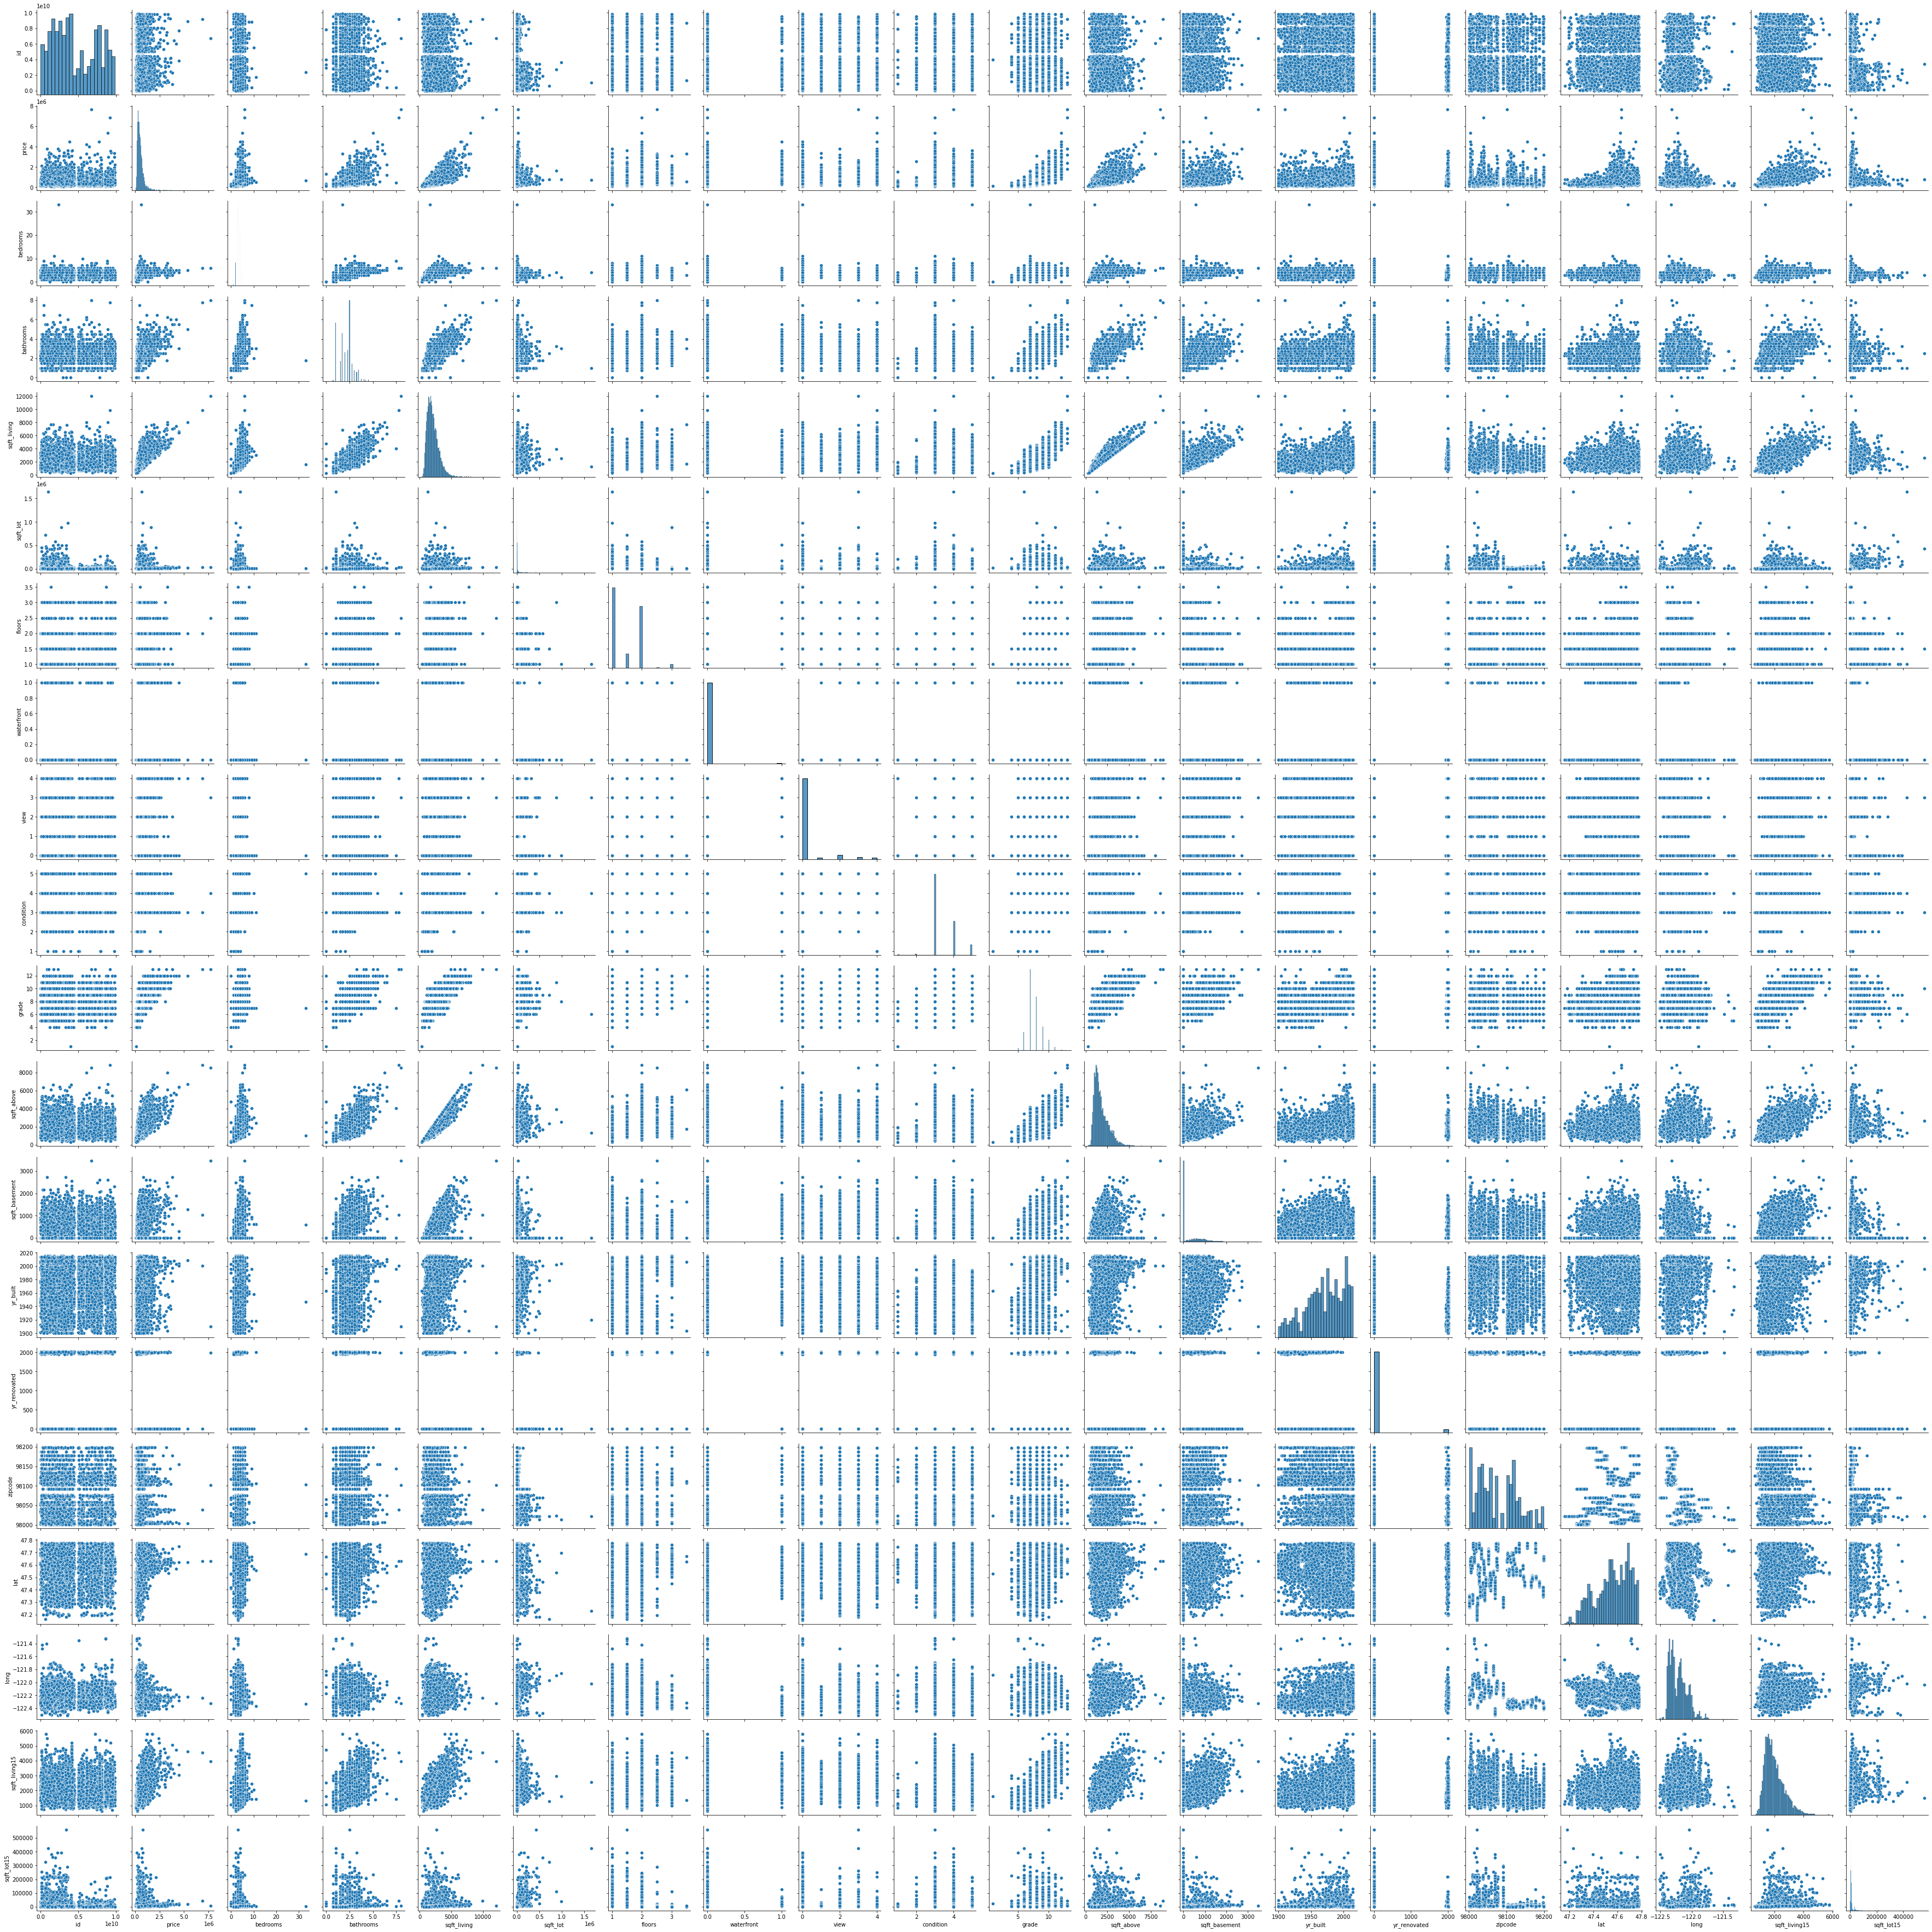

In [11]:
# Pairplot to understand the relationship between varibales in the data 
sns.pairplot(data)
plt.show()

## Report

1. There are linear relationships between variables like price, sqft_living, sqft_above, bedrooms, bathrooms etc. 

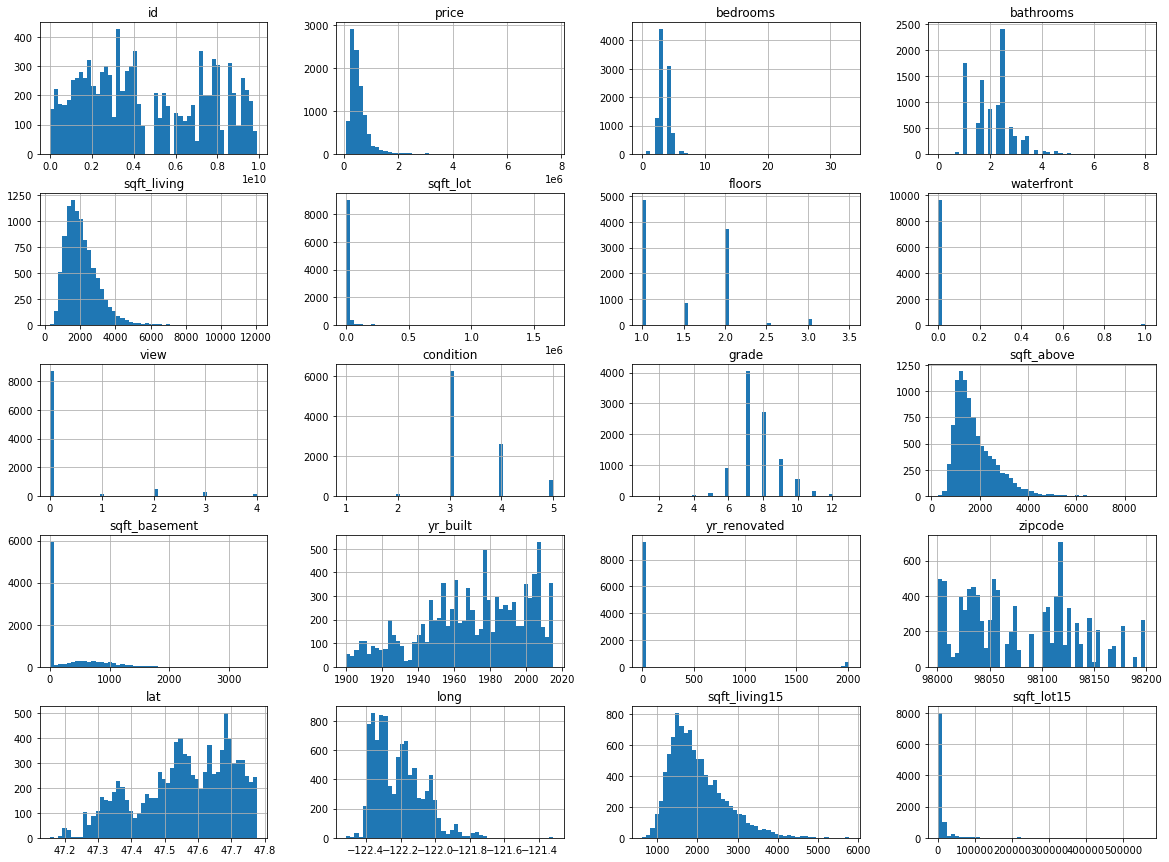

In [12]:
# Plotting a histogram to verify the distributions of the each feature(column) in data.

data.hist(bins=50, figsize=(20,15))
plt.show()


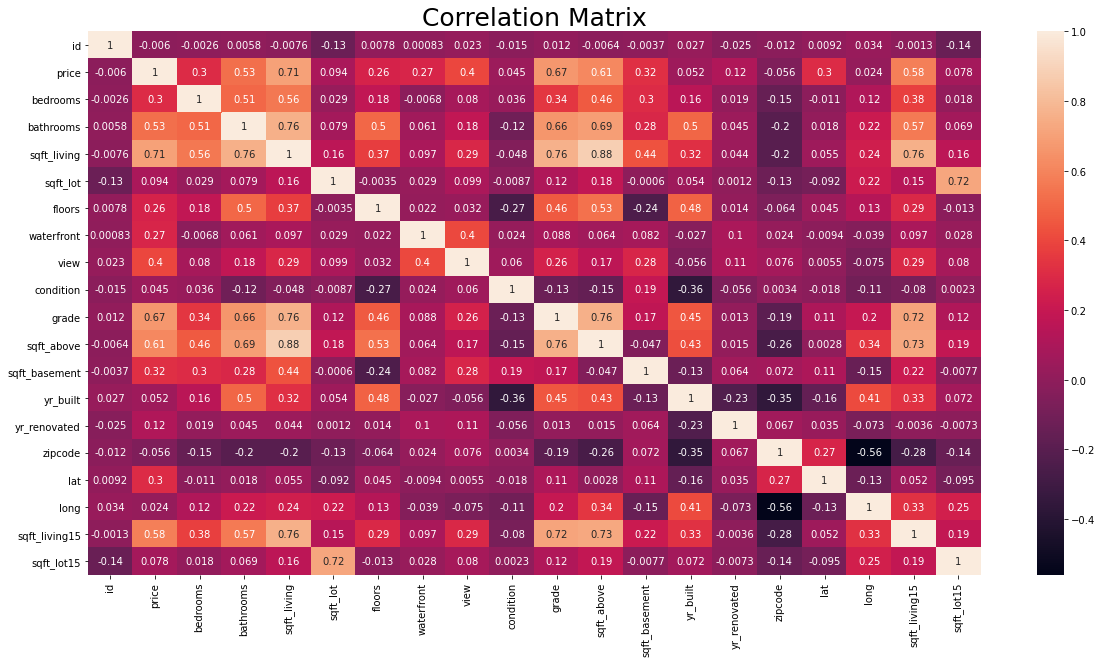

In [13]:
# Finding the correlations between the features using Correlation matrix or heat map

plt.figure(figsize=(20,10))
plt.title("Correlation Matrix",fontsize = 25)

sns.heatmap(data.corr(),annot=True)
plt.show()

## Bedrooms

In [14]:
# summery of price grooup by "bedrooms"
data["price"].groupby(data["bedrooms"]).describe()

count          mean           std       min       25%       50%  \
bedrooms                                                                     
0            6.0  4.201083e+05  4.343699e+05  142000.0  229750.0  250000.0   
1           88.0  3.174748e+05  1.353565e+05   80000.0  226250.0  307500.0   
2         1255.0  4.029756e+05  2.057034e+05   81000.0  269975.0  375000.0   
3         4417.0  4.650605e+05  2.701903e+05   86500.0  292000.0  405000.0   
4         3094.0  6.398707e+05  3.977439e+05  152500.0  375000.0  550000.0   
5          755.0  7.863138e+05  5.736195e+05  133000.0  449750.0  614285.0   
6          116.0  9.104826e+05  1.036003e+06  194990.0  407500.0  652500.0   
7           17.0  8.884212e+05  7.241134e+05  280000.0  539000.0  580000.0   
8            7.0  1.318714e+06  1.063582e+06  373000.0  565000.0  808000.0   
9            3.0  6.946667e+05  2.420441e+05  450000.0  575000.0  700000.0   
10           1.0  6.500000e+05           NaN  650000.0  650000.0  650000.0   
11           1.0  5.200000e+05           NaN  520000.0  520000.0  520000.0   
33           1.0  6.400000e+05           NaN  640000.0  640000.0  640000.0   

                75%        max  
bedrooms                        
0          332500.0  1295650.0  
1          390000.0   680000.0  
2          487000.0  3278000.0  
3          560000.0  3800000.0  
4          770000.0  4489000.0  
5          905000.0  5350000.0  
6          936387.5  7700000.0  
7          936000.0  3200000.0  
8         1810000.0  3300000.0  
9          817000.0   934000.0  
10         650000.0   650000.0  
11         520000.0   520000.0  
33         640000.0   640000.0

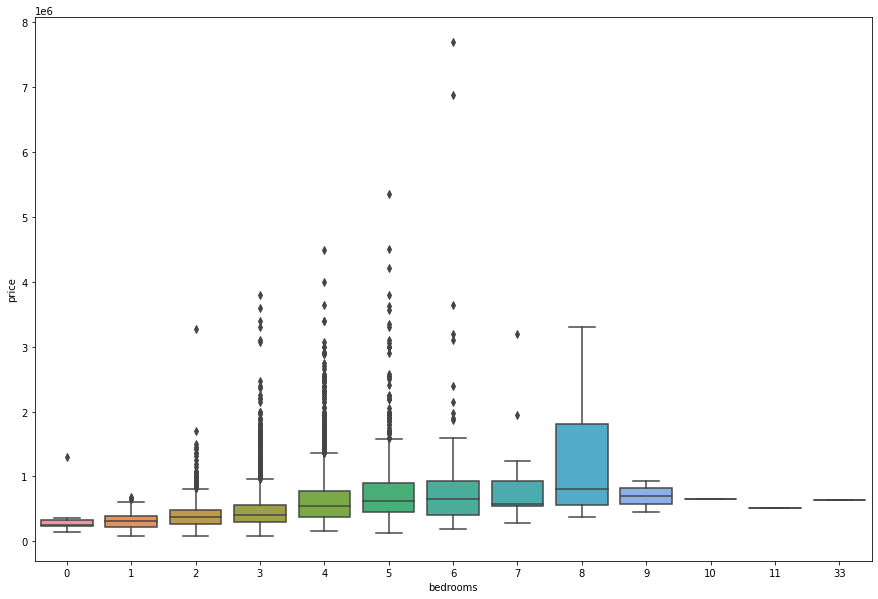

In [15]:
# bivariate analysis
plt.figure(figsize = (15,10))
ax = sns.boxplot(x = "bedrooms",y = "price",data = data)
plt.show()

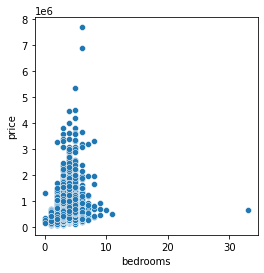

In [16]:
# bivariate analysis
# Scatter plot of bedrooms vs price.
plt.figure(figsize = (4,4))
sns.scatterplot(data=data, x="bedrooms", y="price")
plt.show()

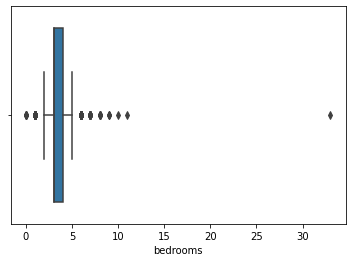

In [17]:
# univariate analysis for seeing outliers
ax = sns.boxplot(x=data["bedrooms"])

In [18]:
# Condition - 1
data[data.bedrooms > data.bedrooms.median()].price.median(),data[data.bedrooms > data.bedrooms.median()].price.count()

(569000.0, 3995)

In [19]:
# Condition - 2
data[data.bedrooms < data.bedrooms.median()].price.median(),data[data.bedrooms < data.bedrooms.median()].price.count()

(365000.0, 1349)

## Report
* As per the condition-1 the price median of bedrooms variable which are greater than the median is significantly high compared to condition - 2.
* As per the above bedrooms can make an impact in the analysis.

## Bathrooms

In [20]:
# summery of price grooup by "bathrooms"
data["price"].groupby(data["bathrooms"]).describe()

count          mean           std        min        25%  \
bathrooms                                                             
0.00          4.0  5.069125e+05  5.330046e+05   142000.0   211750.0   
0.75         37.0  3.071554e+05  1.576172e+05    80000.0   204950.0   
1.00       1741.0  3.444786e+05  1.522154e+05    81000.0   234000.0   
1.25          5.0  5.844900e+05  4.602402e+05   275000.0   321950.0   
1.50        599.0  4.120646e+05  1.930546e+05   107000.0   267250.0   
1.75       1431.0  4.578855e+05  2.110991e+05   115000.0   313000.0   
2.00        871.0  4.442665e+05  1.938863e+05   133000.0   290000.0   
2.25        937.0  5.322676e+05  2.928412e+05   160000.0   336000.0   
2.50       2409.0  5.641237e+05  2.769956e+05   158000.0   365000.0   
2.75        525.0  6.573412e+05  3.093041e+05   199950.0   427000.0   
3.00        335.0  7.188356e+05  4.601422e+05   199950.0   437000.0   
3.25        274.0  9.495515e+05  5.650412e+05   176000.0   586125.0   
3.50        339.0  9.116868e+05  4.477490e+05   248000.0   599975.0   
3.75         72.0  1.242336e+06  6.114320e+05   345100.0   846062.5   
4.00         61.0  1.338571e+06  7.849498e+05   315000.0   739000.0   
4.25         33.0  1.522251e+06  7.893310e+05   490000.0   925000.0   
4.50         47.0  1.291945e+06  7.619895e+05   290000.0   788002.5   
4.75          9.0  1.854749e+06  1.023600e+06   599000.0  1075000.0   
5.00         10.0  2.036750e+06  1.527145e+06   343000.0   883375.0   
5.25          5.0  1.880200e+06  1.043888e+06   300000.0  1681000.0   
5.50          6.0  2.865000e+06  1.403620e+06  1240000.0  1662500.0   
5.75          3.0  1.466667e+06  8.025792e+05   540000.0  1230000.0   
6.00          2.0  3.921500e+06  4.051722e+05  3635000.0  3778250.0   
6.25          1.0  3.300000e+06           NaN  3300000.0  3300000.0   
6.50          2.0  1.709445e+06  7.487483e+05  1180000.0  1444722.5   
7.50          1.0  4.500000e+05           NaN   450000.0   450000.0   
7.75          1.0  6.885000e+06           NaN  6885000.0  6885000.0   
8.00          1.0  7.700000e+06           NaN  7700000.0  7700000.0   

                 50%        75%        max  
bathrooms                                   
0.00        295000.0   590162.5  1295650.0  
0.75        276000.0   355000.0   785000.0  
1.00        315000.0   420000.0  1052000.0  
1.25        397500.0   540000.0  1388000.0  
1.50        375000.0   500000.0  1500000.0  
1.75        423000.0   560000.0  3278000.0  
2.00        414050.0   555632.5  1700000.0  
2.25        467000.0   610000.0  2400000.0  
2.50        510000.0   695000.0  3070000.0  
2.75        591975.0   790000.0  2150000.0  
3.00        612000.0   856000.0  4489000.0  
3.25        810000.0  1138742.5  3640900.0  
3.50        810000.0  1076750.0  3395000.0  
3.75       1094000.0  1528000.0  3345000.0  
4.00       1112500.0  1695000.0  3400000.0  
4.25       1380000.0  2000000.0  3800000.0  
4.50       1050000.0  1599420.0  3567000.0  
4.75       1365000.0  2544750.0  3650000.0  
5.00       1650000.0  2926250.0  5350000.0  
5.25       1862000.0  2458000.0  3100000.0  
5.50       2975000.0  3950000.0  4500000.0  
5.75       1920000.0  1930000.0  1940000.0  
6.00       3921500.0  4064750.0  4208000.0  
6.25       3300000.0  3300000.0  3300000.0  
6.50       1709445.0  1974167.5  2238890.0  
7.50        450000.0   450000.0   450000.0  
7.75       6885000.0  6885000.0  6885000.0  
8.00       7700000.0  7700000.0  7700000.0

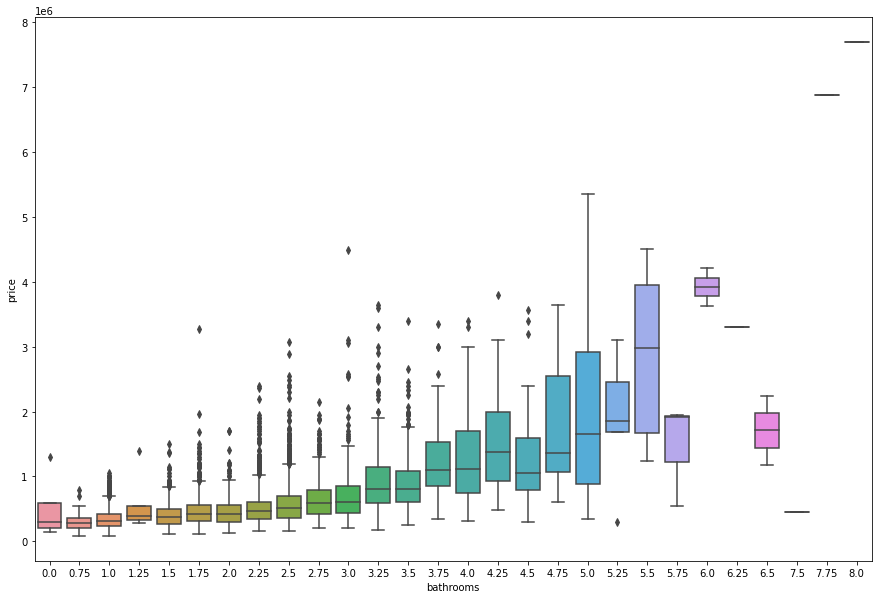

In [21]:
# Bivariate Analysis
plt.figure(figsize = (15,10))
ax = sns.boxplot(x = "bathrooms",y = "price",data = data)
plt.show()

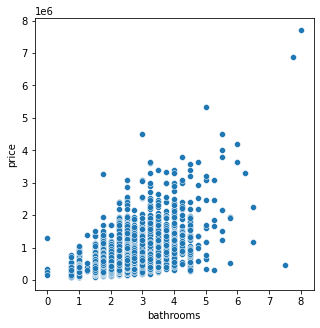

In [22]:
# Scatter plot (bathrooms vs price)
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="bathrooms", y="price")
plt.show()

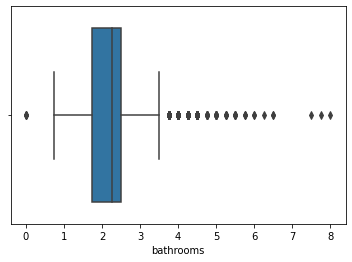

In [23]:
# univariate graph for finding outliers.
ax = sns.boxplot(x=data["bathrooms"])

In [24]:
# Condition - 1
data[data.bathrooms > data.bathrooms.median()].price.median(),data[data.bathrooms > data.bathrooms.median()].price.count()

(585000.0, 4136)

In [25]:
# Condition - 2
data[data.bedrooms < data.bedrooms.median()].price.median(),data[data.bedrooms < data.bedrooms.median()].price.count()

(365000.0, 1349)

## Report
* As per the condition-1 the price median of bathrooms which are greater than the median is significantly high compared to condition - 2.
* As per the above bathrooms can make an impact in the analysis.

## sqft_living

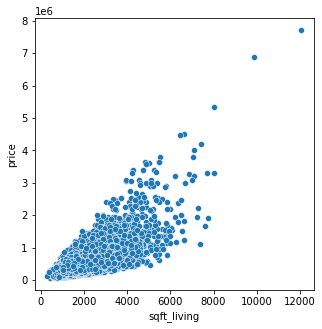

In [26]:
# Bivariate Analysis.
# Scatter plot("sqft_living vs price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="sqft_living", y="price")
plt.show()

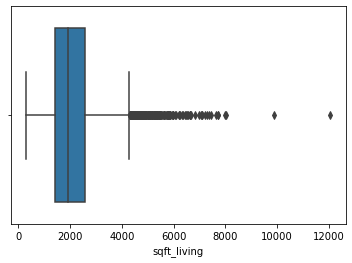

In [27]:
# Univariate analysis for observing outliers
ax = sns.boxplot(x=data["sqft_living"])

In [28]:
# Condition - 1
data[data.sqft_living > data.sqft_living.median()].price.median(),data[data.sqft_living > data.sqft_living.median()].price.count()

(600000.0, 4880)

In [29]:
# Condition - 2
data[data.sqft_living < data.sqft_living.median()].price.median(),data[data.sqft_living < data.sqft_living.median()].price.count()

(350000.0, 4850)

## Report
* As per the condition-1 the price median of sqft_living which are greater than the median is significantly high compared to condition - 2.
* As per the above sqft_living can make an impact in the analysis.

## sqft_lot

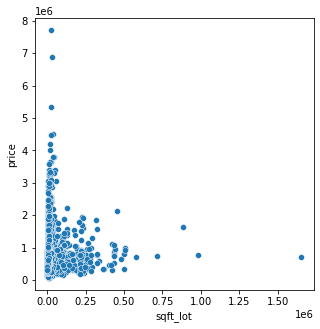

In [30]:
# Bivariate analysis.
# scatter plot ("sqft_lot vs price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="sqft_lot", y="price")
plt.show()

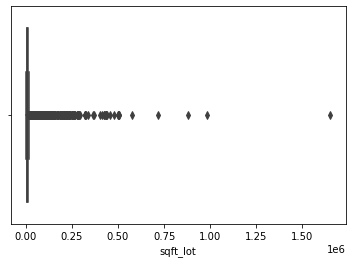

In [31]:
# Univariate analysis for observing outliers.
ax = sns.boxplot(x=data["sqft_lot"])

In [32]:
# Condition - 1
data[data.sqft_lot > data.sqft_lot.median()].price.median(),data[data.sqft_lot > data.sqft_lot.median()].price.count()

(459900.0, 4879)

In [33]:
# Condition - 2
data[data.sqft_lot < data.sqft_lot.median()].price.median(),data[data.sqft_lot < data.sqft_lot.median()].price.count()

(444500.0, 4880)

## Report
* As per the condition-1 the price median of sqft_living which are greater than the median is not significantly high compared to condition - 2.
* As per the above sqft_lot can not make an impact in the analysis.

## floors

In [34]:
# summery of price grooup by "floors"
data["price"].groupby(data["floors"]).describe()

count          mean           std       min        25%        50%  \
floors                                                                       
1.0     4862.0  4.396636e+05  2.648808e+05   80000.0   275000.0   383075.0   
1.5      867.0  5.767767e+05  3.288560e+05  123300.0   380000.0   536000.0   
2.0     3723.0  6.559501e+05  4.410320e+05  139500.0   379000.0   550000.0   
2.5       62.0  1.167610e+06  1.164878e+06  255000.0   499250.0   802100.0   
3.0      245.0  5.779881e+05  3.615798e+05  205000.0   380500.0   474950.0   
3.5        2.0  1.912500e+06  1.962221e+06  525000.0  1218750.0  1912500.0   

              75%        max  
floors                        
1.0      529000.0  3800000.0  
1.5      687750.0  3650000.0  
2.0      785000.0  6885000.0  
2.5     1343750.0  7700000.0  
3.0      610000.0  3100000.0  
3.5     2606250.0  3300000.0

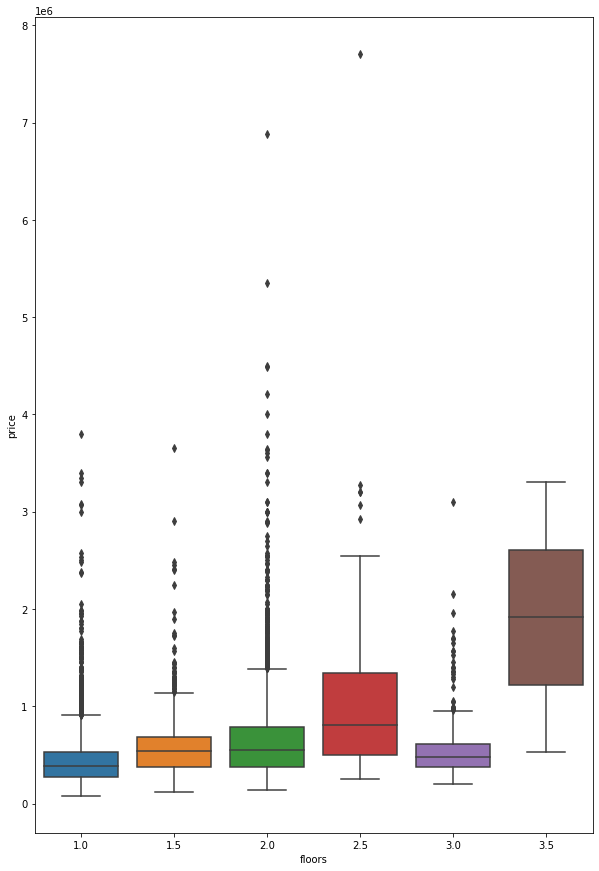

In [35]:
# Bivariate analysis.
plt.figure(figsize = (10,15))
ax = sns.boxplot(x = "floors",y = "price",data = data)
plt.show()

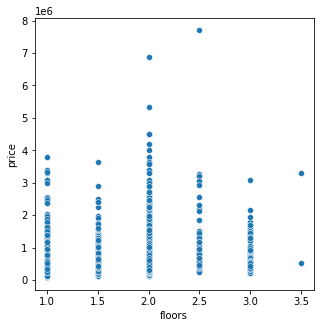

In [36]:
# Scatter plot ("floors" vs "price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="floors", y="price")
plt.show()

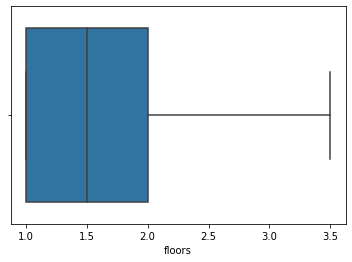

In [37]:
# Univariate analysis for observing outliers.
ax = sns.boxplot(x=data["floors"])

In [38]:
# Condition - 1
data[data.floors > data.floors.mean()].price.median(),data[data.floors > data.floors.mean()].price.count()

(542126.0, 4899)

In [39]:
# Condition - 1
data[data.floors < data.floors.mean()].price.median(),data[data.floors < data.floors.mean()].price.count()

(383075.0, 4862)

## Report
* As per the condition-1 the price median of floors which are greater than the mean is significantly high compared to condition - 2.
* As per the above floors can  make an impact in the analysis.

## Waterfront

In [40]:
# summery of price grooup by "waterfront"
data["price"].groupby(data["waterfront"]).describe()

count          mean           std       min       25%        50%  \
waterfront                                                                      
0           9679.0  5.331297e+05  3.547225e+05   80000.0  319970.0   449950.0   
1             82.0  1.676508e+06  1.004797e+06  285000.0  760000.0  1582500.0   

                  75%        max  
waterfront                        
0            640000.0  7700000.0  
1           2300000.0  4500000.0

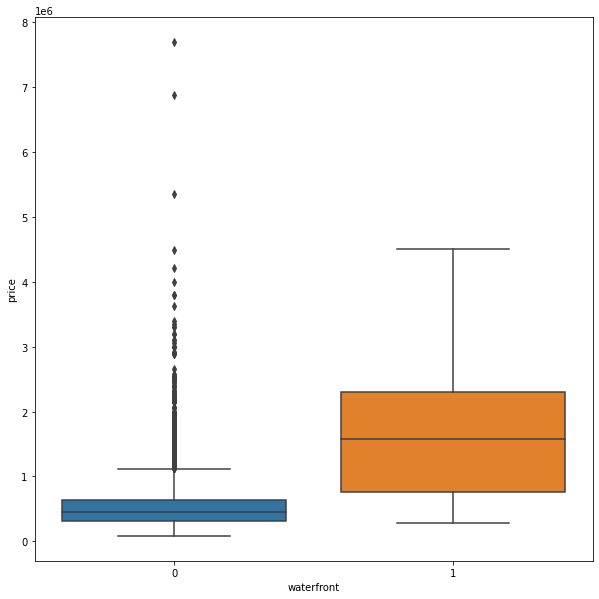

In [41]:
# Bivariate analysis.
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = "waterfront",y = "price",data = data)
plt.show()

In [42]:
# Condition - 1
data[data.waterfront == 1].price.median(),data[data.waterfront == 1].price.count()

(1582500.0, 82)

In [43]:
# Condition - 1
data[data.waterfront == 0].price.median(),data[data.waterfront == 0].price.count()

(449950.0, 9679)

## Report
* As per the condition-1 the price median of waterfront is significantly high compared to condition - 2.
* As per the above waterfront can  make an impact in the analysis.

## view

In [44]:
# summery of price grooup by "view"
data["price"].groupby(data["view"]).describe()

count          mean           std       min       25%        50%  \
view                                                                      
0     8748.0  4.963600e+05  2.939117e+05   80000.0  310000.0   430000.0   
1      160.0  8.150720e+05  5.030568e+05  217000.0  508000.0   680000.0   
2      454.0  7.931251e+05  4.657146e+05  169317.0  500000.0   681000.0   
3      243.0  9.472500e+05  6.541233e+05  154000.0  550000.0   790000.0   
4      156.0  1.505171e+06  1.031124e+06  252000.0  807500.0  1195000.0   

            75%        max  
view                        
0      600000.0  4489000.0  
1      958750.0  3345000.0  
2      950000.0  3800000.0  
3     1214250.0  7700000.0  
4     1910000.0  6885000.0

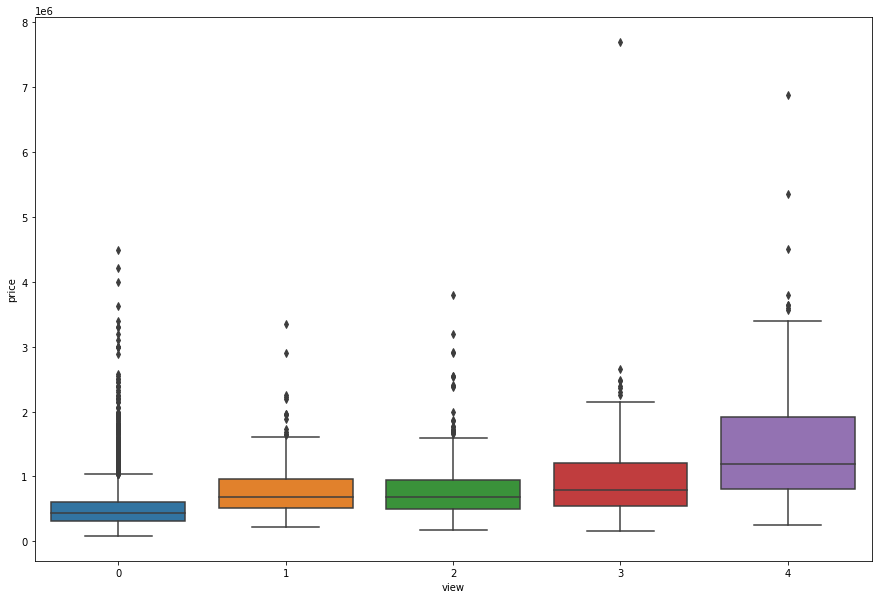

In [45]:
# Bivariate analysis.
plt.figure(figsize = (15,10))
ax = sns.boxplot(x = "view",y = "price",data = data)
plt.show()

In [46]:
# Condition - 1
data[data.view > data.view.median()].price.median(),data[data.view > data.view.median()].price.count()

(765000.0, 1013)

In [47]:
# Condition - 2
data[data.view == data.view.median()].price.median(),data[data.view == data.view.median()].price.count()

(430000.0, 8748)

## Report
* As per the condition-1 the price median of view which are greater than the median is significantly high compared to condition - 2.
* As per the above view can  make an impact in the analysis.

## condition

In [48]:
# summery of price grooup by "condition"
data["price"].groupby(data["condition"]).describe()

count           mean            std       min       25%       50%  \
condition                                                                       
1            10.0  471500.000000  403756.596093   81000.0  256500.0  396000.0   
2            78.0  328911.064103  301271.616353   80000.0  183750.0  269975.0   
3          6291.0  543123.240343  372158.596376   86500.0  325625.0  450000.0   
4          2610.0  519824.937931  370782.816009  100000.0  301000.0  436400.0   
5           772.0  639552.340674  448804.933600  140000.0  354687.5  545000.0   

                75%        max  
condition                       
1          542500.0  1500000.0  
2          372500.0  2555000.0  
3          645250.0  6885000.0  
4          625000.0  7700000.0  
5          746237.5  3650000.0

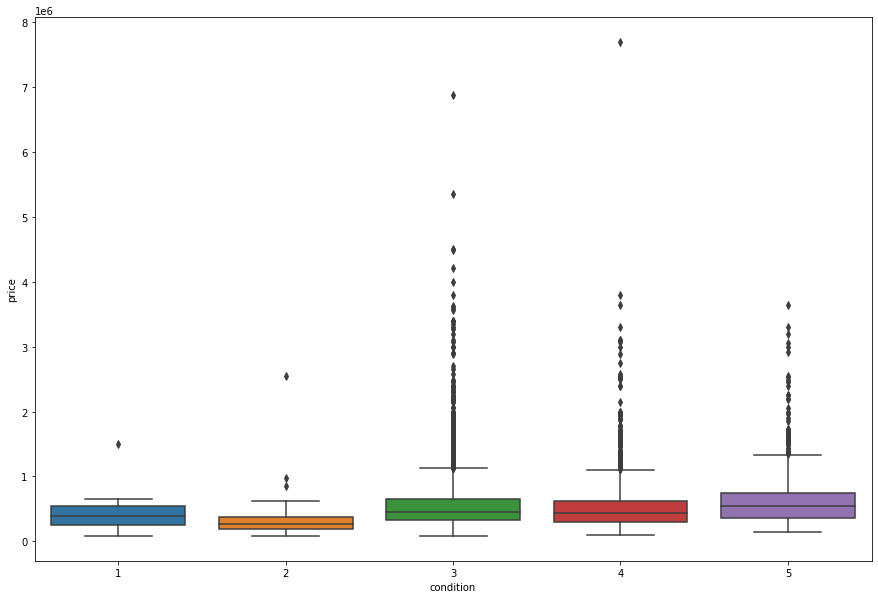

In [49]:
# Bivariate Analysis.
plt.figure(figsize = (15,10))
ax = sns.boxplot(x = "condition",y = "price",data = data)
plt.show()

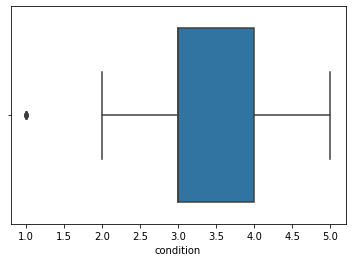

In [50]:
# Univariate analysis for observing outliers.
ax = sns.boxplot(x=data["condition"])

In [51]:
# Condition - 1
data[data.condition > data.condition.mean()].price.median(),data[data.condition > data.condition.mean()].price.count()

(450000.0, 3382)

In [52]:
# Condition - 2
data[data.condition < data.condition.mean()].price.median(),data[data.condition < data.condition.mean()].price.count()

(450000.0, 6379)

## Report
* As per the condition-1 the price median of condition which are greater than the mean is not significantly high compared to condition - 2.
* But count of the condition -1 very high compared condition - 2. so that we considered condition can make impact in the analysis. 


## grade

In [53]:
# summery of price grooup by "grade index"
data["price"].groupby(data["grade"]).describe()

count          mean           std        min        25%        50%  \
grade                                                                        
1         1.0  1.420000e+05           NaN   142000.0   142000.0   142000.0   
4        17.0  2.208853e+05  9.951337e+04    80000.0   151000.0   217000.0   
5       107.0  2.280887e+05  9.164311e+04    81000.0   157500.0   215000.0   
6       914.0  3.036966e+05  1.255649e+05    86500.0   215000.0   280000.0   
7      4067.0  4.016521e+05  1.574742e+05   100000.0   284525.0   371000.0   
8      2707.0  5.425066e+05  2.208845e+05   160000.0   390000.0   506000.0   
9      1192.0  7.766575e+05  3.124217e+05   259950.0   575000.0   725944.0   
10      532.0  1.078128e+06  5.066496e+05   316000.0   774037.5   911500.0   
11      172.0  1.530820e+06  6.875031e+05   420000.0  1061875.0  1295000.0   
12       45.0  2.166210e+06  1.061354e+06   835000.0  1488000.0  1769000.0   
13        7.0  4.221429e+06  2.233332e+06  1780000.0  2792500.0  3800000.0   

             75%        max  
grade                        
1       142000.0   142000.0  
4       265000.0   435000.0  
5       284000.0   658000.0  
6       365000.0  1052000.0  
7       487000.0  1650000.0  
8       637750.0  3070000.0  
9       889237.5  2546000.0  
10     1250000.0  3600000.0  
11     1812500.0  3650000.0  
12     2574000.0  5350000.0  
13     5342500.0  7700000.0

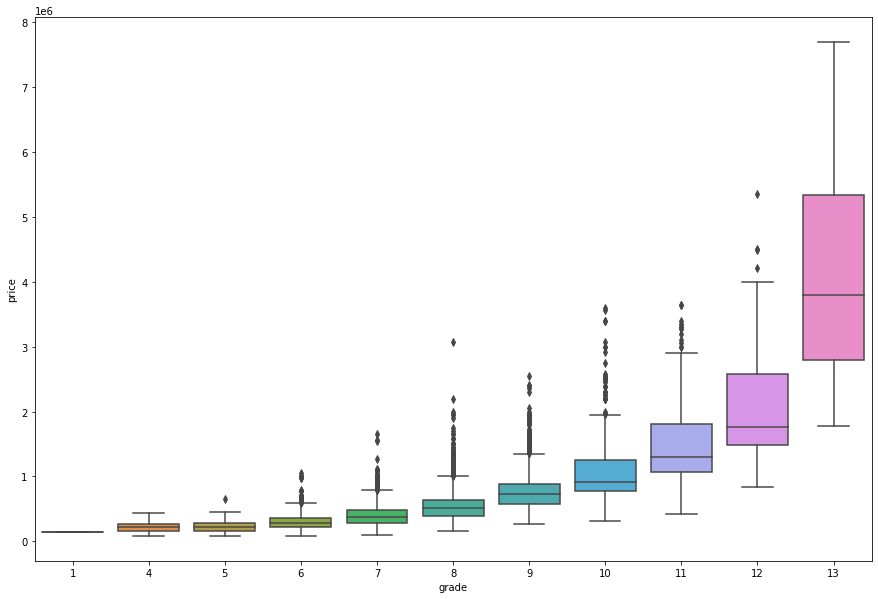

In [54]:
# Bivariate analysis.
plt.figure(figsize = (15,10))
ax = sns.boxplot(x = "grade",y = "price",data = data)
plt.show()

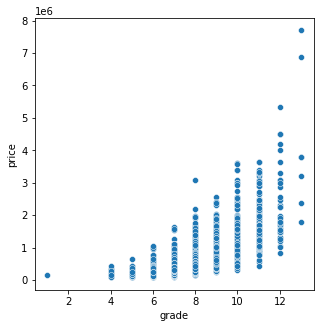

In [55]:
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="grade", y="price")
plt.show()

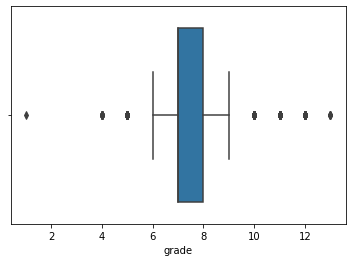

In [56]:
# univariate analysis for observing outliers.
ax = sns.boxplot(x=data["grade"])

In [57]:
# Condition - 1
data[data.grade > data.grade.median()].price.median(),data[data.grade > data.grade.median()].price.count()

(610000.0, 4655)

In [58]:
# Condition - 2
data[data.grade < data.grade.median()].price.median(),data[data.grade < data.grade.median()].price.count()

(270000.0, 1039)

## Report
* As per the condition-1 the price median of grade which are greater than the median is significantly high compared to condition - 2.
* As per the above grade can  make an impact in the analysis.

## sqft_above

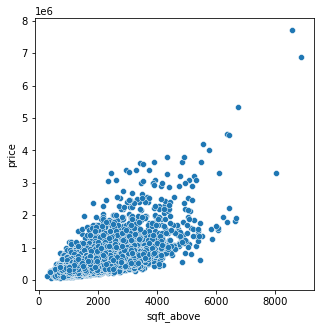

In [59]:
# Bivariate analysis.
# Scatter plot ("sqft_above" vs "price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="sqft_above", y="price")
plt.show()

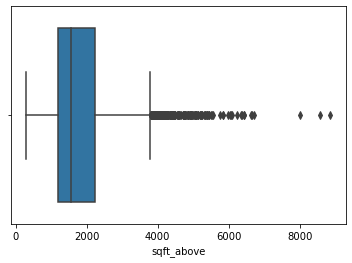

In [60]:
# univariate analysis for observing outliers.
ax = sns.boxplot(x=data["sqft_above"])

In [61]:
# Condition - 1
data[data.sqft_above > data.sqft_above.median()].price.median(),data[data.sqft_above > data.sqft_above.median()].price.count()

(580000.0, 4834)

In [62]:
# Condition - 2
data[data.sqft_above < data.sqft_above.median()].price.median(),data[data.sqft_above < data.sqft_above.median()].price.count()

(370000.0, 4879)

## Report
* As per the condition-1 the price median of sqft_above which are greater than the median is significantly high compared to condition - 2.
* As per the above sqft_above can  make an impact in the analysis.
* This is making impact but this holds multicollinearity with sqft_living.

## sqft_basement

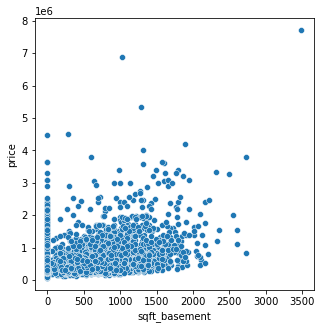

In [63]:
# Bivariate analysis.
# Scatter plot ("sqft_basement" vs "price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="sqft_basement", y="price")
plt.show()

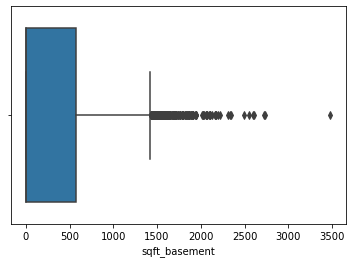

In [64]:
# Univariate analysis for observing outliers.
ax = sns.boxplot(x=data["sqft_basement"])

In [65]:
# Condition - 1
data[data.sqft_basement > data.sqft_basement.median()].price.median(),data[data.sqft_basement > data.sqft_basement.median()].price.count()

(523250.0, 3820)

In [66]:
# Condition - 2
data[data.sqft_basement == data.sqft_basement.median()].price.median(),data[data.sqft_basement == data.sqft_basement.median()].price.count()

(408474.0, 5941)

## Report
* As per the condition-1 the price median of sqft_basement which are greater than the median is  significantly high compared to condition - 2.
* As per the above sqft_basement can  make an impact in the analysis.
* This is making impact but this holds multicollinearity with sqft_living so it ignored.

## yr_built

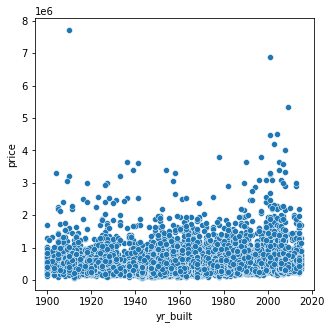

In [67]:
# Bivariate analysis.
# Scatter plot ("yr_built" vs "price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="yr_built", y="price")
plt.show()

## yr_renovated

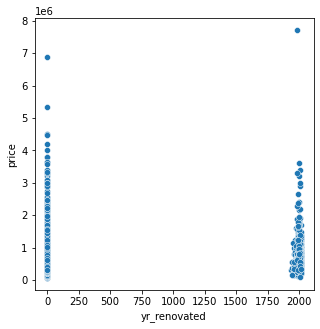

In [68]:
# Bivariate analysis.
# Scatter plot ("yr_renovated" vs "price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="yr_renovated", y="price")
plt.show()

## zipcode

In [69]:
# summery of price grooup by "zipcode"
data["price"].groupby(data["zipcode"]).describe()

count          mean            std       min        25%        50%  \
zipcode                                                                       
98001    158.0  2.799354e+05   98974.510305  100000.0  215625.00   260000.0   
98002     78.0  2.350487e+05   53195.262077  112000.0  203125.00   234500.0   
98003    123.0  3.098921e+05  120166.897483  128000.0  243500.00   280000.0   
98004    138.0  1.433854e+06  746510.792209  610000.0  911250.00  1270000.0   
98005     76.0  7.848988e+05  251994.320805  400000.0  617862.50   741725.0   
...        ...           ...            ...       ...        ...        ...   
98177    122.0  6.460942e+05  456307.824747  245560.0  402000.00   525150.0   
98178    110.0  3.096124e+05  181582.992199   90000.0  221760.25   276277.0   
98188     57.0  2.934215e+05  111573.782334  130000.0  233000.00   259500.0   
98198    127.0  2.916772e+05  136612.629475  120000.0  226250.00   265000.0   
98199    140.0  8.073665e+05  384491.970080  330000.0  542911.25   704500.0   

               75%        max  
zipcode                        
98001     304250.0   850000.0  
98002     265000.0   389000.0  
98003     345950.0   950000.0  
98004    1697750.0  5350000.0  
98005     885000.0  1900000.0  
...            ...        ...  
98177     668750.0  3800000.0  
98178     348152.5  1700000.0  
98188     325000.0   706000.0  
98198     309500.0  1225000.0  
98199     982500.0  3200000.0  

[70 rows x 8 columns]

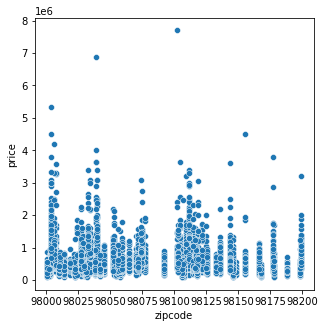

In [70]:
# Bivariate analysis.
# Scatter plot ("zipcode" vs "price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="zipcode", y="price")
plt.show()

## lat

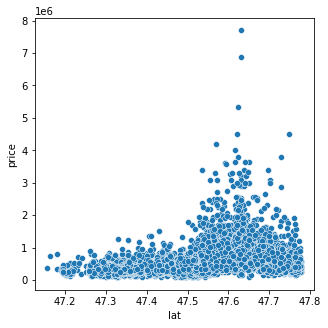

In [71]:
# Bivariate analysis.
# Scatter plot ("lat" vs "price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="lat", y="price")
plt.show()

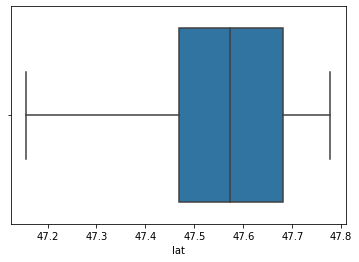

In [72]:
# Univariate analysis for observing outliers.
ax = sns.boxplot(x=data["lat"])

In [73]:
# Condition - 1
data[data.lat > data.lat.mean()].price.median(),data[data.lat > data.lat.mean()].price.count()

(560000.0, 5226)

In [74]:
# Condition - 2
data[data.lat < data.lat.mean()].price.median(),data[data.lat < data.lat.mean()].price.count()

(330000.0, 4535)

## Report
* As per the condition-1 the price median of lat which are greater than the mean is significantly high compared to condition - 2.
* As per the above lat can make an impact in the analysis.

## long

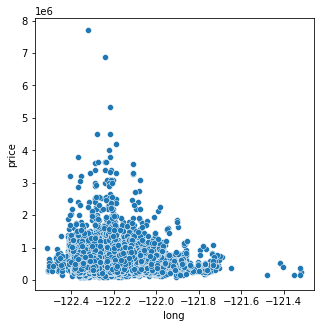

In [75]:
# Bivariate analysis.
# Scatter plot ("long" vs "price")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="long", y="price")
plt.show()

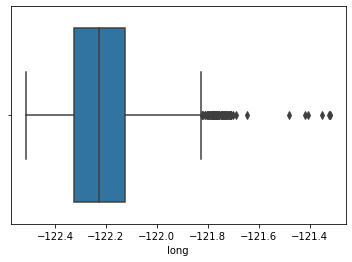

In [76]:
# Univariate analysis for observing outliers.
ax = sns.boxplot(x=data["long"])

In [77]:
# Condition - 1
data[data.long > data.long.median()].price.median(),data[data.long > data.long.median()].price.count()

(475000.0, 4861)

In [78]:
# Condition - 2
data[data.long < data.long.median()].price.median(),data[data.long < data.long.median()].price.count()

(430000.0, 4872)

## Report
* As per the condition-1 the price median of long which are greater than the median is not significantly high compared to condition - 2.
* As per the above long can not make an impact in the analysis.

## sqft_livings15

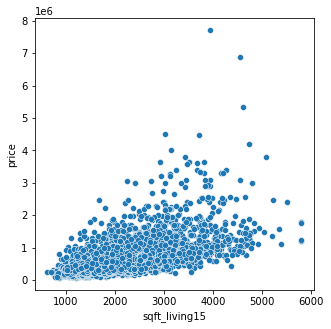

In [79]:
# Bivariate analysis.
# Scatter plot ("price" vs "sqft_living15")
plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="sqft_living15", y="price")
plt.show()

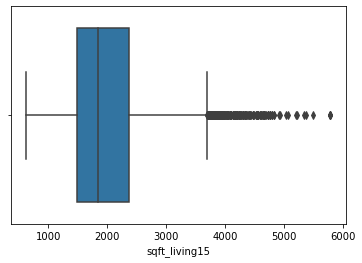

In [80]:
# Unvariate analysis for observing outliers.
ax = sns.boxplot(x=data["sqft_living15"])

In [81]:
# Condition - 1
data[data.sqft_living15 > data.sqft_living15.median()].price.median(),data[data.sqft_living15 > data.sqft_living15.median()].price.count()

(579975.0, 4876)

In [82]:
# Condition - 2
data[data.sqft_living15 < data.sqft_living15.median()].price.median(),data[data.sqft_living15 < data.sqft_living15.median()].price.count()

(360000.0, 4826)

## Report
* As per the condition-1 the price median of sqft_living15 which are greater than the median is significantly high compared to condition - 2.
* As per the above sqft_living15 can make an impact in the analysis.
* This can make impact but this also collinearity with sqft_living so it is ignored.

## sqft_lot15

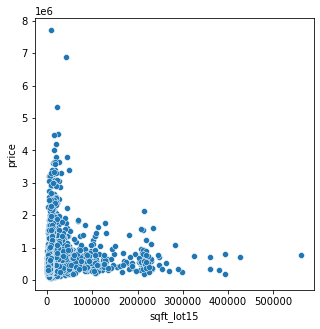

In [83]:
# Bivariate analysis.
# Scatter plot ("price" vs "sqft_living15")

plt.figure(figsize = (5,5))
sns.scatterplot(data=data, x="sqft_lot15", y="price")
plt.show()

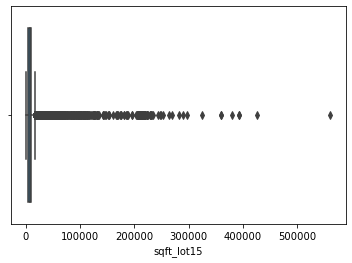

In [84]:
# Unvariate analysis for observing outliers.
ax = sns.boxplot(x=data["sqft_lot15"])

In [85]:
# Condition - 1
data[data.sqft_lot15 > data.sqft_lot15.median()].price.median(),data[data.sqft_lot15 > data.sqft_lot15.median()].price.count()

(455000.0, 4880)

In [86]:
# Condition - 2
data[data.sqft_lot15 < data.sqft_lot15.median()].price.median(),data[data.sqft_lot15 < data.sqft_lot15.median()].price.count()

(447000.0, 4879)

## Report
* As per the condition-1 the price median of sqft_lot15 which are greater than the median is not significantly high compared to condition - 2.
* As per the above sqft_lot15 can not make an impact in the analysis.

## Correlation value with best fitting line.

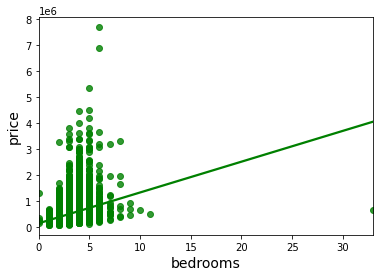

Correlation value between bedrooms and price is  0.30080805898427443 



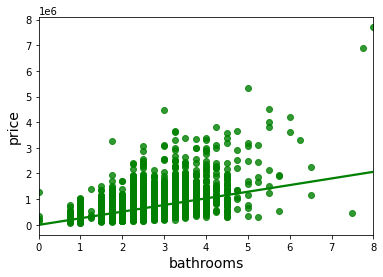

Correlation value between bathrooms and price is  0.5275318683463102 



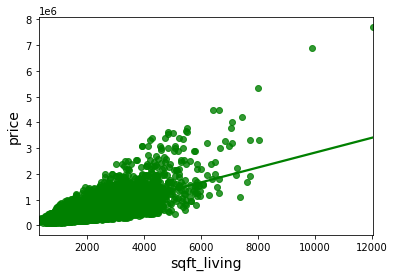

Correlation value between sqft_living and price is  0.7050523445510575 



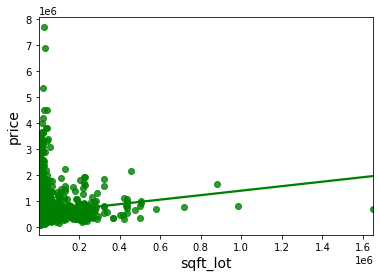

Correlation value between sqft_lot and price is  0.09414276412116135 



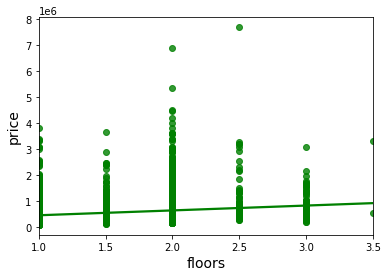

Correlation value between floors and price is  0.2629540419296235 



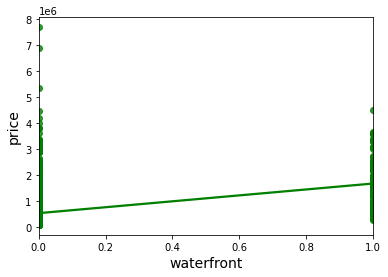

Correlation value between waterfront and price is  0.2749771595116976 



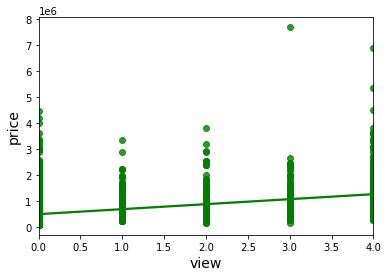

Correlation value between view and price is  0.39965776088548394 



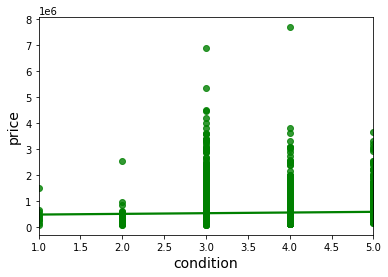

Correlation value between condition and price is  0.04473206114038395 



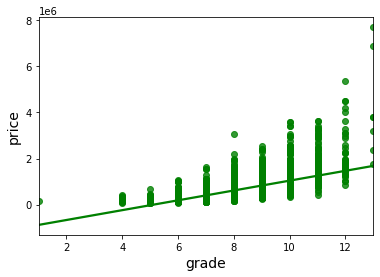

Correlation value between grade and price is  0.6655668886526259 



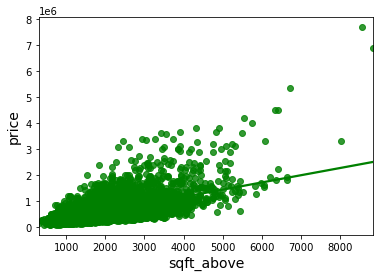

Correlation value between sqft_above and price is  0.6114525333708124 



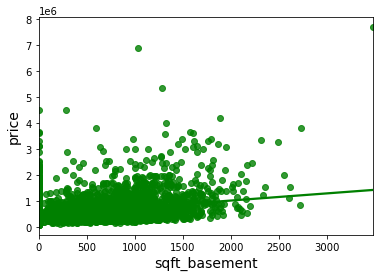

Correlation value between sqft_basement and price is  0.32238254101457287 



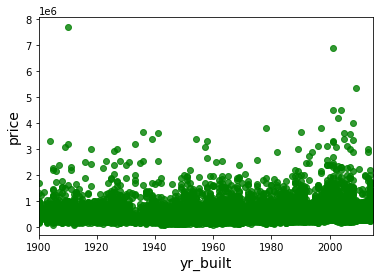

Correlation value between yr_built and price is  0.05175863686850263 



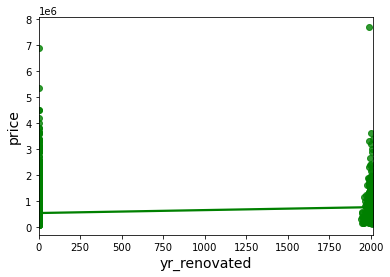

Correlation value between yr_renovated and price is  0.12047199044912595 



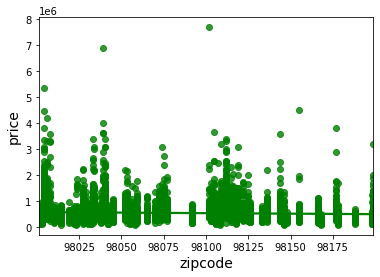

Correlation value between zipcode and price is  -0.05562852489819539 



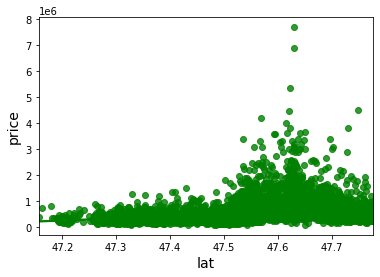

Correlation value between lat and price is  0.2992804618818449 



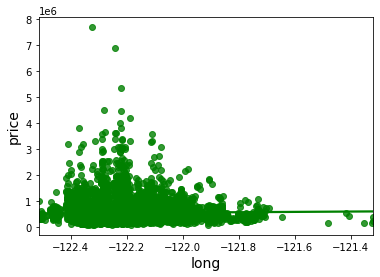

Correlation value between long and price is  0.023753764148991805 



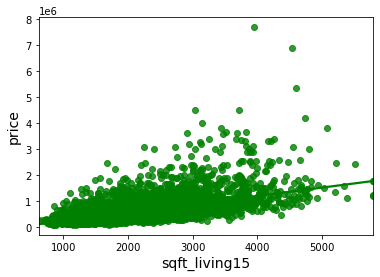

Correlation value between sqft_living15 and price is  0.5848073919462378 



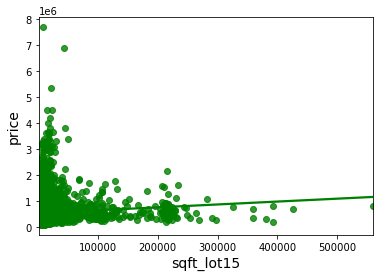

Correlation value between sqft_lot15 and price is  0.07794266139577648 



In [87]:
data0 = data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
for column in data0:
    x = data0[column]
    y = data["price"]
    if column == "price":
        continue
    else:
        plt.figure(figsize = (6,4))
        sns.regplot(x = x,
        y = y, 
        ci = None,
        data = data,color = 'green')
        plt.xlabel(column,fontsize = 14)
        plt.ylabel("price", fontsize = 14)
        plt.show()
        correlation = y.corr(x)
        print("Correlation value between "+column+" and price is ",correlation,"\n")

##  Correlation Report:
from the above observations we can conclude that the variables "sqft_living","grade",."sqft_above","sqft_living15 and bathrooms are have shown affect on price compared to rest of the variables.

"sqft_living", "grade" and "sqft_above" strongly positive correlated with price.

"bedrooms", "bathrooms", "sqft_living15 and "view"and "sqft_basement" are moderately positive correlated with price.

"year_built", "year_renovated", "sqft_lot,floors", "waterfront", "condition" and "sqft_lot15" weakly positive correlated with price.

## EDA Final Report

from above bivariate analysis we can conclude that "bedrooms", "bathrooms", "sqft_living", "sqft_above", "view", "condition", "grade", "sqft_above", "lat", "long" and sqft_living15" variables can make impact in analysis.

but sqft_above and sqft_living15 we can eliminate  because these are having  collinearity with sqft_living. (sqft_living = sqft_above + sqft_basement).


##  3) Initial model(Linear Regression) fitting step

In [88]:
# Definign function with arguments (X_train,y_train)
def initial_model(X_train,y_train = data[["price"]]):
    X = X_train[:]
    y = y_train[:]
    model = LinearRegression().fit(X,y)                 # Defining the linear regression model and fitting X_train and y_train data.
    cv = KFold(n_splits=10,shuffle = True , random_state = 1)      # for giving K'fold value
    R_square = cross_val_score(model,X,y,cv = cv,scoring = "r2")   # getting R-square value.
    NMSE = cross_val_score(model,X,y,cv = cv,scoring = "neg_mean_squared_error")   # getting "Negative mean square error"
    RMSE = np.sqrt(abs(NMSE.mean()))                                  # Calculating RMSE.
    print("R-square and RMSE values are")
    return(R_square.mean(),RMSE)

In [89]:
initial_model(X_train = data[["sqft_living"]])

R-square and RMSE values are


(0.49192398970754325, 269354.30997023516)

In [90]:
initial_model(X_train = data[["sqft_living","grade"]])

R-square and RMSE values are


(0.5323878219069637, 259016.91351259087)

In [91]:
initial_model(X_train = data[["sqft_living","grade","waterfront"]])

R-square and RMSE values are


(0.5722580710572249, 247462.75767132302)

In [92]:
initial_model(X_train = data[["sqft_living","grade","lat"]])

R-square and RMSE values are


(0.5916076659016696, 242163.30946374722)

In [93]:
initial_model(X_train = data[["sqft_living","grade","lat","waterfront"]])

R-square and RMSE values are


(0.6336911456448566, 229154.45057972797)

In [94]:
initial_model(X_train = data[['bathrooms','sqft_living','waterfront','view','grade','lat']])

R-square and RMSE values are


(0.6504996713891964, 223912.93114930834)

#### Various sets of predictors are considered, but the last set have highest r2 and lowest rmse

## Report :

#### During the initial model fitting, by considering the columns ['bathrooms','sqft_living','waterfront','view','grade','lat'], they are giving the highest r2 and lowest rmse values.
**r2 = 0.6504996713891963**

**rmse = 223912.93114930834**

## Feature Engineering

Feature engineerig help to Preparing the proper input dataset, compatible with the machine learning algorithm requirements. Improving the performance of machine learning models.

List of Techniques

1.Handling Outliers

2.Log Transform

3.One-Hot Encoding

4.Feature Split

## Handling Outliers
Outlier is a data point in the dataset that differs significantly from the other data or observations. The outlier is inherently different than Noise. While Outlier is a data that significantly different compared to the other data, Noise is a random error or variance. The outlier is part of the data, but Noise is just a random error.

So outliers should be treated properly before fitting the model.


In [95]:
# Dropping the variables which are not impacted price.
data_outliers = data.drop(["id","date","waterfront","yr_built","yr_renovated","zipcode"],axis = 1)

In [96]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [97]:
data_outliers.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [98]:
# Outliers shape of the selected columns which are impact the price.
for column in data_outliers:
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR= Q3-Q1
    upper_limit_column = Q3 + IQR*1.5
    lower_limit_column = Q1 - IQR*1.5
    x = pd.DataFrame(data[(data[column] > upper_limit_column) | (data[column] < lower_limit_column)])
    
    print("Shape of the outliers in %s variable" %column)
    print(x.shape,"\n")

Shape of the outliers in price variable
(522, 21) 

Shape of the outliers in bedrooms variable
(240, 21) 

Shape of the outliers in bathrooms variable
(258, 21) 

Shape of the outliers in sqft_living variable
(240, 21) 

Shape of the outliers in sqft_lot variable
(1089, 21) 

Shape of the outliers in floors variable
(0, 21) 

Shape of the outliers in view variable
(1013, 21) 

Shape of the outliers in condition variable
(10, 21) 

Shape of the outliers in grade variable
(881, 21) 

Shape of the outliers in sqft_above variable
(267, 21) 

Shape of the outliers in sqft_basement variable
(210, 21) 

Shape of the outliers in lat variable
(0, 21) 

Shape of the outliers in long variable
(121, 21) 

Shape of the outliers in sqft_living15 variable
(237, 21) 

Shape of the outliers in sqft_lot15 variable
(990, 21) 



## Report
 1) From the above observation price, bedrooms, bathrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, sqft_living15 and sqft_lot15 variables having large amount of data in outliers, these can impact on our analysis so we cannot remove outliers but we can reduce these by log transformation.

 2) we can do log transformation for price, bedrooms, bathrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, sqft_living15 and sqft_lot15 variables because these are having outliers.




## Log Transformation

In [99]:
# Drop unimpacted columns.
data1 = data.drop(["id","date","waterfront","yr_built","yr_renovated","zipcode"],axis = 1).copy()

In [100]:
data1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [101]:
data1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0   604000.0         4       3.00         1960      5000     1.0     0   
1  1225000.0         4       4.50         5420    101930     1.0     0   
2   468000.0         2       1.00         1160      6000     1.0     0   
3   310000.0         3       1.00         1430     19901     1.5     0   
4   400000.0         3       1.75         1370      9680     1.0     0   

   condition  grade  sqft_above  sqft_basement      lat     long  \
0          5      7        1050            910  47.5208 -122.393   
1          3     11        3890           1530  47.6561 -122.005   
2          4      7         860            300  47.6900 -122.292   
3          4      7        1430              0  47.7558 -122.229   
4          4      7        1370              0  47.6127 -122.045   

   sqft_living15  sqft_lot15  
0           1360        5000  
1           4760      101930  
2           1330        6000  
3           1780       12697  
4           1370       10208

In [102]:
# Applying log for selected variables which are having high outliers.

data1["bedrooms"] = np.log(data.bedrooms +1)
data1["bathrooms"] = np.log(data.bathrooms +1)
data1["sqft_living"] = np.log(data.sqft_living)
data1["sqft_lot"] = np.log(data.sqft_lot)
data1["view"] = np.log(data.view +1)
data1["condition"] = np.log(data.condition)
data1["grade"] = np.log(data.grade)
data1["sqft_above"] = np.log(data.sqft_above)
data1["sqft_basement"] = np.log(data.sqft_basement +1)
data1["sqft_living15"] = np.log(data.sqft_living15)
data1["sqft_lot15"] = np.log(data.sqft_lot15)

In [103]:
data1.head()

price  bedrooms  bathrooms  sqft_living   sqft_lot  floors  view  \
0   604000.0  1.609438   1.386294     7.580700   8.517193     1.0   0.0   
1  1225000.0  1.609438   1.704748     8.597851  11.532042     1.0   0.0   
2   468000.0  1.098612   0.693147     7.056175   8.699515     1.0   0.0   
3   310000.0  1.386294   0.693147     7.265430   9.898525     1.5   0.0   
4   400000.0  1.386294   1.011601     7.222566   9.177817     1.0   0.0   

   condition     grade  sqft_above  sqft_basement      lat     long  \
0   1.609438  1.945910    6.956545       6.814543  47.5208 -122.393   
1   1.098612  2.397895    8.266164       7.333676  47.6561 -122.005   
2   1.386294  1.945910    6.756932       5.707110  47.6900 -122.292   
3   1.386294  1.945910    7.265430       0.000000  47.7558 -122.229   
4   1.386294  1.945910    7.222566       0.000000  47.6127 -122.045   

   sqft_living15  sqft_lot15  
0       7.215240    8.517193  
1       8.468003   11.532042  
2       7.192934    8.699515  
3       7.484369    9.449121  
4       7.222566    9.230927

In [104]:
# getting outliers after applyig log transformation.
for column in data1:
    Q1 = data1[column].quantile(.25)
    Q3 = data1[column].quantile(.75)
    IQR= Q3-Q1
    upper_limit_column = Q3 + IQR*1.5
    lower_limit_column = Q1 - IQR*1.5
    x = pd.DataFrame(data1[(data1[column] > upper_limit_column) | (data1[column] < lower_limit_column)])
    
    print("Shape of the outliers in %s variable" %column)
    print(x.shape,"\n")

Shape of the outliers in price variable
(522, 15) 

Shape of the outliers in bedrooms variable
(240, 15) 

Shape of the outliers in bathrooms variable
(162, 15) 

Shape of the outliers in sqft_living variable
(51, 15) 

Shape of the outliers in sqft_lot variable
(1124, 15) 

Shape of the outliers in floors variable
(0, 15) 

Shape of the outliers in view variable
(1013, 15) 

Shape of the outliers in condition variable
(10, 15) 

Shape of the outliers in grade variable
(881, 15) 

Shape of the outliers in sqft_above variable
(26, 15) 

Shape of the outliers in sqft_basement variable
(0, 15) 

Shape of the outliers in lat variable
(0, 15) 

Shape of the outliers in long variable
(121, 15) 

Shape of the outliers in sqft_living15 variable
(28, 15) 

Shape of the outliers in sqft_lot15 variable
(1079, 15) 



## Report 
1) After applying log transformation we didn't get significiant change in outliers.So we have to do analysis with outliers.


In [105]:
data1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [106]:
# Drop unimpacted variables.
data_sub = data.drop(["id","date","waterfront","yr_built","yr_renovated","zipcode",'bedrooms','bathrooms','floors','view','condition','grade','sqft_basement','lat','long'],axis = 1)

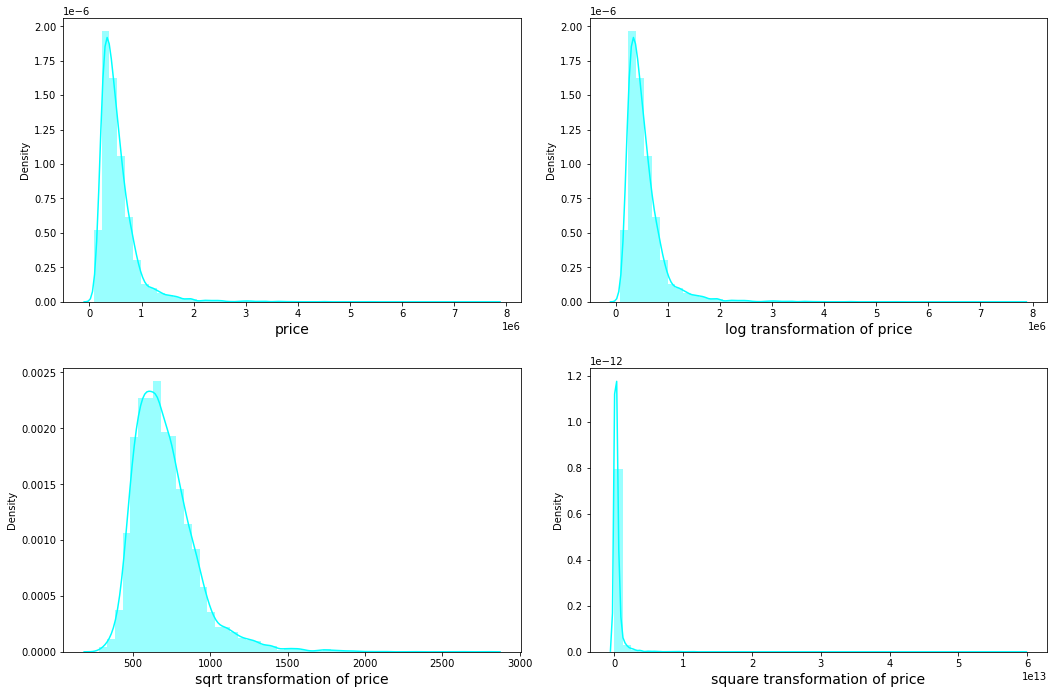

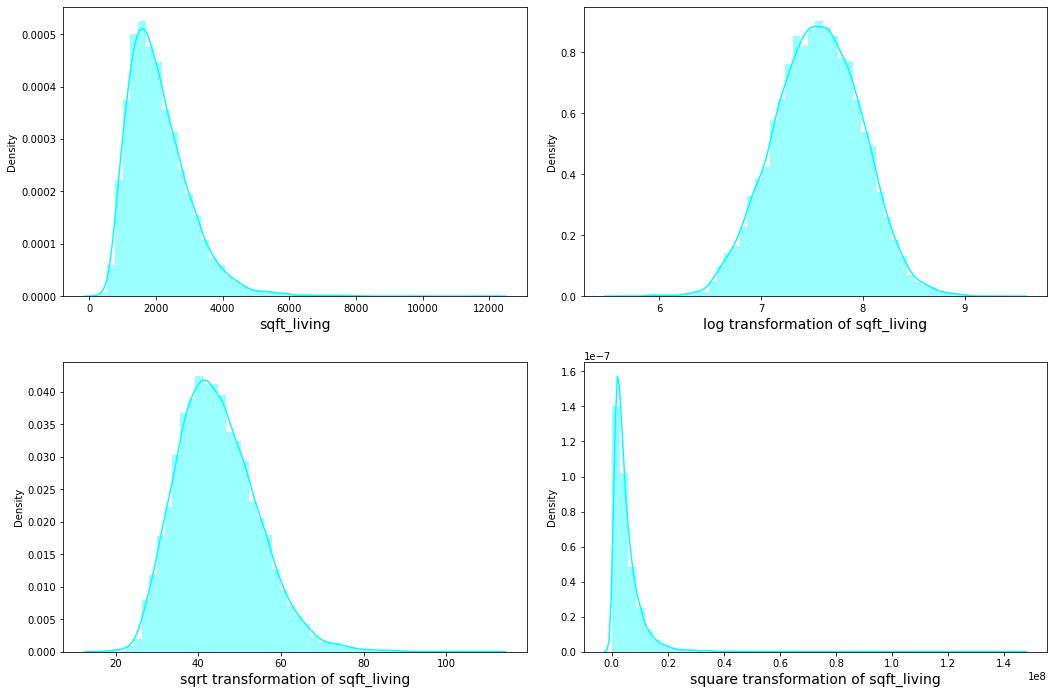

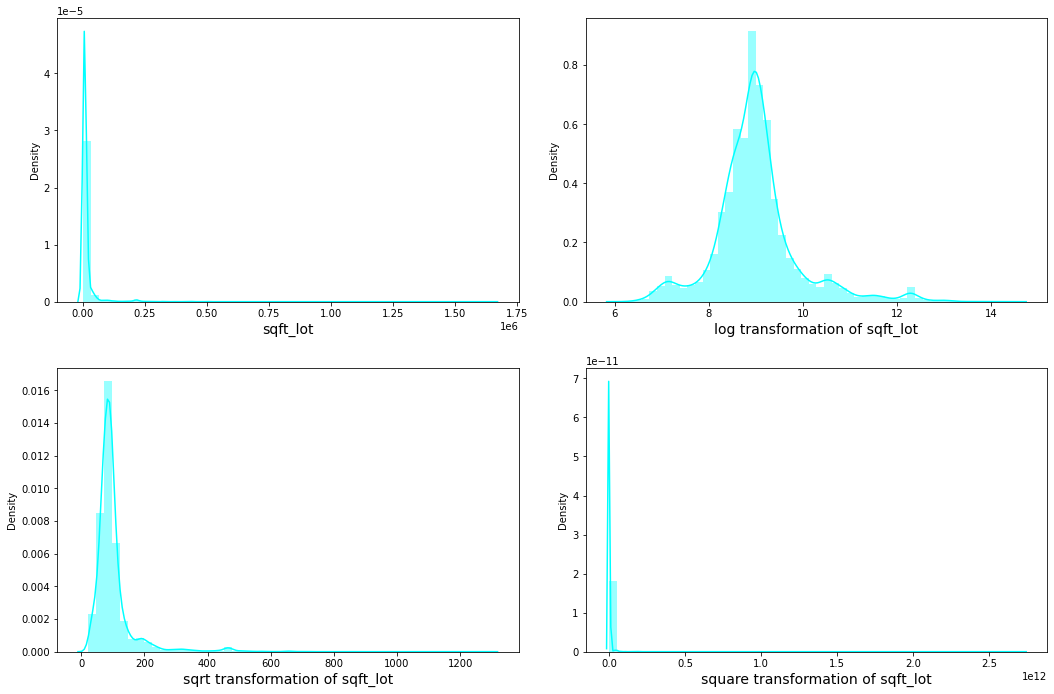

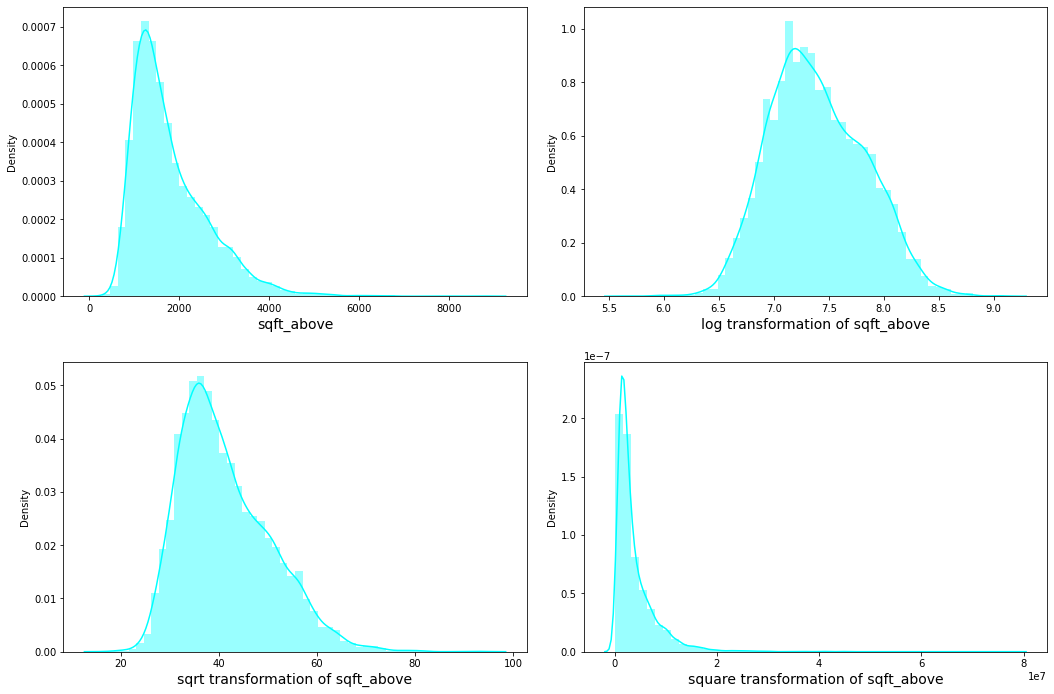

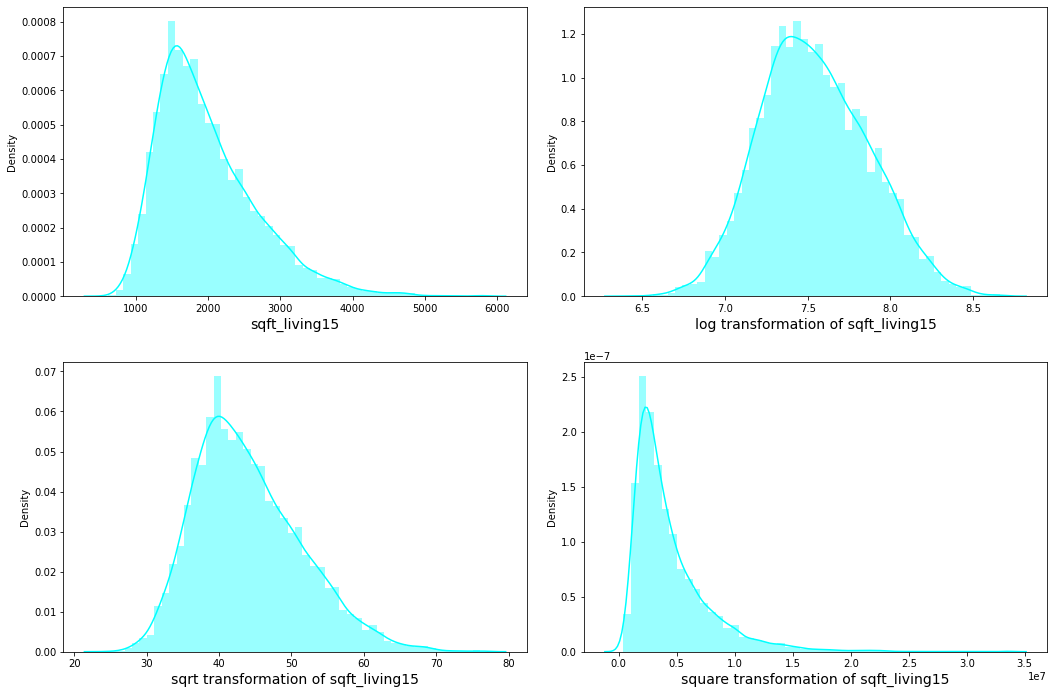

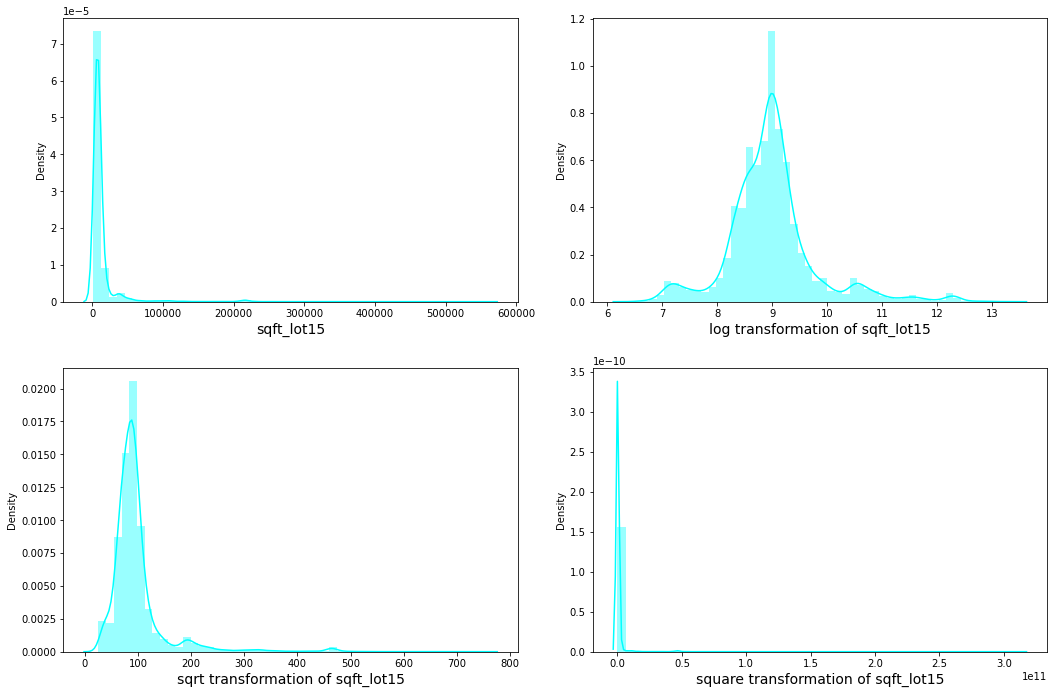

In [107]:
# Plot the graphs(normal, log transformation,sqrt transfromation and square transformation) for selected columns which impact price.
# These plots plotted by sub-plot concept.
for columns in data_sub:
    plt.figure(figsize=(15,10))                     
    plt.subplot(2, 2, 1)         
    sns.distplot(data_sub[columns],color = "cyan")
    plt.xlabel(columns,fontsize = 14)  
    
    plt.subplot(2, 2, 2)                            
    sns.distplot(data1[columns],color = "cyan")
    plt.xlabel("log transformation of "+columns,fontsize = 14)
    
    plt.subplot(2, 2, 3)                            
    sns.distplot(np.sqrt(data_sub[columns]),color = "cyan")  
    plt.xlabel("sqrt transformation of "+columns,fontsize = 14)
    
    plt.subplot(2, 2, 4)                            
    sns.distplot(np.square(data_sub[columns]),color = "cyan")  
    plt.xlabel("square transformation of "+columns,fontsize = 14)
    
    
    plt.tight_layout(pad=2)             
    plt.show()                                       
    plt.close("all")

## Report 
* By performing feature transformations like log,square and squareroot , we can confirm that normal distribution formed with log and square root. It completely reduced leftskew distribution.

* As it is right skew, squaring this variable makes more right skew distribution. So, We have not used square feature elimination

## Creating 'Age' column

Creating a new column Age which gives the age of the house. Age is obtained by subtracting yr_built values from year sold.

In [108]:
# ADDING NEW FEATURES FOR TRAINING DATA
# AGE IS DEFINED AS THE YR_SOLD -YR_BUILD
# ADDING "AGE" COLUMN TO THE DATA
data2 = data.copy()
j = []
for i in data2.date:
    j.append(i)
import datetime
data2["datenew"] = pd.to_datetime(j)
data2['year'] = pd. DatetimeIndex(data2['datenew']). year
data2["age"] = data2["year"]- data2["yr_built"]

In [109]:
data2.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875  20141209T000000   604000.0         4       3.00         1960   
1  7237550310  20140512T000000  1225000.0         4       4.50         5420   
2  9212900260  20140527T000000   468000.0         2       1.00         1160   
3   114101516  20140528T000000   310000.0         3       1.00         1430   
4  6054650070  20141007T000000   400000.0         3       1.75         1370   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0      5000     1.0           0     0  ...      1965             0    98136   
1    101930     1.0           0     0  ...      2001             0    98053   
2      6000     1.0           0     0  ...      1942             0    98115   
3     19901     1.5           0     0  ...      1927             0    98028   
4      9680     1.0           0     0  ...      1977             0    98074   

       lat     long  sqft_living15  sqft_lot15    datenew  year  age  
0  47.5208 -122.393           1360        5000 2014-12-09  2014   49  
1  47.6561 -122.005           4760      101930 2014-05-12  2014   13  
2  47.6900 -122.292           1330        6000 2014-05-27  2014   72  
3  47.7558 -122.229           1780       12697 2014-05-28  2014   87  
4  47.6127 -122.045           1370       10208 2014-10-07  2014   37  

[5 rows x 24 columns]

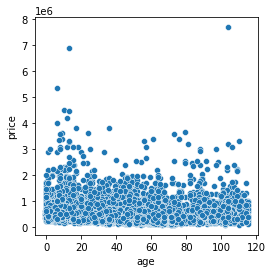

In [110]:
#now we check the price of a house wrt to age of the house.
plt.figure(figsize = (4,4))
sns.scatterplot(data=data2, x="age", y="price")
plt.show()

## Report
after adding new features it is clearly visible that age of a house is a major factor in deciding the price.

as age of a house keep increasing price reducing 

In [111]:

initial_model(X_train = data2[['bathrooms','sqft_living','waterfront','view','grade','lat',"age"]])

R-square and RMSE values are


(0.6843929508113658, 212970.73512880725)

In [112]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Report :
**Although there is no linearilty for age  with price, age is considered because we can see that values below median and above median are having a considerable amount of difference which we can consider. We can see that r2 is increased and rmse value got decreased.**

## One hot encoding

ONE HOT ENCODING IS A WAY CONVERTING DATA INTO TO PREPARE FOR AN ALGORITHM WHICH HAS BETTER PREDICTION. WITH ONE HOT WE CONVERT CATEGORIAL INTO NUMERICAL AND CONVERT IT INTO 0 OR 1.
HERE EACH INTEGER REPRESNT AS A BINARY VECTOR.
WE CHOOSE THAT PARAMETER FOR HOT ENCODING THAT HAS OR NOT CONTRIBUTING ANY KIND OF A RELATIONSHIP INTO OUR DATASET.

THEREFORE WE CHOOSE DATE AS OUR HOT ENCODING PARAMETER.

In [113]:
# Copy the data into another variable.
data3 = data.copy()

In [114]:
# Drop unimpacted columns from the data.
data3 = data3.drop(['id', 'date', 'bedrooms', 'sqft_lot', 'floors', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'long', 'sqft_living15', 'sqft_lot15'],axis = 1)

In [115]:
#one hot emcoding for categorial dataset.
dummies = pd.get_dummies(data3["zipcode"],drop_first=False)

In [116]:
# concating dummy variables to data.
data3 = pd.concat([data3,dummies],axis = "columns")

In [117]:
data3.head()

price  bathrooms  sqft_living  waterfront  view  grade  zipcode  \
0   604000.0       3.00         1960           0     0      7    98136   
1  1225000.0       4.50         5420           0     0     11    98053   
2   468000.0       1.00         1160           0     0      7    98115   
3   310000.0       1.00         1430           0     0      7    98028   
4   400000.0       1.75         1370           0     0      7    98074   

       lat  98001  98002  ...  98146  98148  98155  98166  98168  98177  \
0  47.5208      0      0  ...      0      0      0      0      0      0   
1  47.6561      0      0  ...      0      0      0      0      0      0   
2  47.6900      0      0  ...      0      0      0      0      0      0   
3  47.7558      0      0  ...      0      0      0      0      0      0   
4  47.6127      0      0  ...      0      0      0      0      0      0   

   98178  98188  98198  98199  
0      0      0      0      0  
1      0      0      0      0  
2      0      0      0      0  
3      0      0      0      0  
4      0      0      0      0  

[5 rows x 78 columns]

In [118]:
# drop zipcode and one of the dummy varible.
# dummy variable is dropped because to eliminate "multi - collinearity".this process is called "dummy trap"
data3 = data3.drop(["zipcode",98146],axis = 1)

In [119]:
data3.head()

price  bathrooms  sqft_living  waterfront  view  grade      lat  98001  \
0   604000.0       3.00         1960           0     0      7  47.5208      0   
1  1225000.0       4.50         5420           0     0     11  47.6561      0   
2   468000.0       1.00         1160           0     0      7  47.6900      0   
3   310000.0       1.00         1430           0     0      7  47.7558      0   
4   400000.0       1.75         1370           0     0      7  47.6127      0   

   98002  98003  ...  98144  98148  98155  98166  98168  98177  98178  98188  \
0      0      0  ...      0      0      0      0      0      0      0      0   
1      0      0  ...      0      0      0      0      0      0      0      0   
2      0      0  ...      0      0      0      0      0      0      0      0   
3      0      0  ...      0      0      0      0      0      0      0      0   
4      0      0  ...      0      0      0      0      0      0      0      0   

   98198  98199  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  

[5 rows x 76 columns]

In [120]:
# model execute with dummy variables and impacted columns which are we found in previous iterations.
initial_model(data3.drop(["price"],axis = 1),data3[["price"]])

R-square and RMSE values are


(0.7868028502876852, 175725.88788696702)

In [121]:
data_dup = data.copy()

In [122]:
# Adding age column
j = []
for i in data_dup.date:
    j.append(i)
import datetime
data3["datenew"] = pd.to_datetime(j)
data3['year'] = pd. DatetimeIndex(data3['datenew']). year
data3["age"] = data3["year"]- data_dup["yr_built"]

In [123]:
data3 = data3.drop(["datenew","year"], axis = 1)

In [124]:
data3.head()

price  bathrooms  sqft_living  waterfront  view  grade      lat  98001  \
0   604000.0       3.00         1960           0     0      7  47.5208      0   
1  1225000.0       4.50         5420           0     0     11  47.6561      0   
2   468000.0       1.00         1160           0     0      7  47.6900      0   
3   310000.0       1.00         1430           0     0      7  47.7558      0   
4   400000.0       1.75         1370           0     0      7  47.6127      0   

   98002  98003  ...  98148  98155  98166  98168  98177  98178  98188  98198  \
0      0      0  ...      0      0      0      0      0      0      0      0   
1      0      0  ...      0      0      0      0      0      0      0      0   
2      0      0  ...      0      0      0      0      0      0      0      0   
3      0      0  ...      0      0      0      0      0      0      0      0   
4      0      0  ...      0      0      0      0      0      0      0      0   

   98199  age  
0      0   49  
1      0   13  
2      0   72  
3      0   87  
4      0   37  

[5 rows x 77 columns]

In [125]:
# model execute with dummy variables ,age and  impacted columns which are we found in previous iterations.
initial_model(data3.drop(["price"],axis = 1),data3[["price"]])

R-square and RMSE values are


(0.7911493664165772, 173953.82780954658)

## Report

From the above observations "bathrooms", "sqft_living" , "waterfront", "view", "grade","age" and dummy variables highly impact the "price".

without using age column the model gave R-square and RMSE values 0.7868 and 175725.89 respectively.

with using age column the model gave R-square and RMSE values 0.7911 and 173953.82 respectively.

Model gave best performance when used  "bathrooms", "sqft_living" , "waterfront", "view", "grade","age" and dummy variables are predictors.


## 5) Model fitting step 2 

## Forward selection & Backward Elimination Features

Forward selection:
Forward stepwise selection (or forward selection) is a variable selection method which:

Begins with a model that contains no variables (called the Null Model)
Then starts adding the most significant variables one after the other
Until a pre-specified stopping rule is reached or until all the variables under consideration are included in the model

In [126]:
# import required features.
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

### Forward Selelction Feature for Linear Regression.

In [127]:
# Forward Selection Feature.
data4 = data.copy()

# adding age column to dataset.
j = []
for i in data4.date:
    j.append(i)
import datetime
data4["datenew"] = pd.to_datetime(j)
data4['year'] = pd. DatetimeIndex(data4['datenew']). year
data4["age"] = data4["year"]- data4["yr_built"]

# droping impact columns from the data and assign to X_train .
X_train = data4.drop(["id","price","date","zipcode","datenew","year"], axis = 1)
y_train = data4[["price"]]                 # Assign target variable y_train

# fit the Linear Regression model.
LR = LinearRegression()

# K_features value is number of variables we considered to get the output.
for_sel = sfs(LR, k_features = 6, forward=True,scoring='r2',n_jobs = -1)
fsl_fit = for_sel.fit(X_train, y_train)
fsl1 = list(fsl_fit.k_feature_names_)

initial_model(data4[fsl1],data4[["price"]])

R-square and RMSE values are


(0.6823199253752066, 213658.40939653604)

### Forward Selection with zipcode used as dummy variable

In [128]:
data5 = data.copy()
# adding age column to dataset.
j = []
for i in data5.date:
    j.append(i)
import datetime
data5["datenew"] = pd.to_datetime(j)
data5['year'] = pd. DatetimeIndex(data5['datenew']). year
data5["age"] = data5["year"]- data5["yr_built"]

# Add dummy variables for "zipcode" column.
dummies = pd.get_dummies(data5["zipcode"],drop_first=False)
data5 = pd.concat([data5,dummies],axis = "columns")

# Drop unimpacted columns.
X_train = data5.drop(["price","datenew","year",98146,"id","date","zipcode"], axis = 1)
y_train = data5[["price"]]

# Fitting Linear Regression Model.
LR = LinearRegression()

# K_features value is number of variables we considered to get the output.
for_sel = sfs(LR, k_features = 25, forward=True, scoring='r2',n_jobs = -1)
fsl_fit = for_sel.fit(X_train, y_train)
fsl2 = list(fsl_fit.k_feature_names_)
initial_model(data5[fsl2],data5[["price"]])


R-square and RMSE values are


(0.7805180229235942, 177998.60386394092)

## Backward Elimination for Linear Regression.

In [129]:
data4 = data.copy()
# addig age column to dataset.
j = []
for i in data4.date:
    j.append(i)
import datetime
data4["datenew"] = pd.to_datetime(j)
data4['year'] = pd. DatetimeIndex(data4['datenew']). year
data4["age"] = data4["year"]- data4["yr_built"]

# drop unimpacted columns from the data and assign to X_train
X_train = data4.drop(["id","price","date","zipcode","datenew","year"], axis = 1)
y_train = data4[["price"]]           # assign target variable to y_train.

# fit the linear regression  model.
LR = LinearRegression()

# K_features value is number of variables we considered to get the output.
back_eli = sfs(LR, k_features = 6, forward=False, scoring='r2',n_jobs = -1)
bel_fit = back_eli.fit(X_train, y_train)
bel1 = list(bel_fit.k_feature_names_)

initial_model(data4[bel1],data4[["price"]])

R-square and RMSE values are


(0.6743295431977823, 216289.1830259074)

## Backward Selection with zipcode used as dummy variable.

In [130]:
data5 = data.copy()
# adding age column to the dataset.
j = []
for i in data5.date:
    j.append(i)
import datetime
data5["datenew"] = pd.to_datetime(j)
data5['year'] = pd. DatetimeIndex(data5['datenew']). year
data5["age"] = data5["year"]- data5["yr_built"]

# adding dummy variables of zipcode to the data set.
dummies = pd.get_dummies(data5["zipcode"],drop_first=False)
data5 = pd.concat([data5,dummies],axis = "columns")

X_train = data5.drop(["price","datenew","year",98146,"id","date","zipcode"], axis = 1)
y_train = data5[["price"]]

# K_features value is number of variables we considered to get the output.
back_eli = sfs(LR, k_features = 25, forward=False, scoring='r2',n_jobs = -1)
bel_fit = back_eli.fit(X_train, y_train)
bel2 = list(bel_fit.k_feature_names_)

initial_model(data5[bel2],data5[["price"]])

R-square and RMSE values are


(0.7820396844470789, 177444.77171482184)

## Report

In forward selection Linear Regression model k_feature value we taken as 6. means it take 6 high impacted variables from all variables.
 
In forward selection Linear Regression model we got R-square and RMSE values are 0.6823199253752066, 213658.40939653604 respectively.

In forward selection Linear Regression model with zipcode dummy variables, k_features value we taken as 25.means it take 25 high impacted variables from all variables.

In forward selection Linear Regression model with zipcode dummy variables. we got R-square and RMSE values are 0.7805180229235942, 177998.60386394092 respectively.

In backward elimination Linear Regression model k_feature value we taken as 6. means it take 6 high impacted variables from all variables.
 
In backward elimination Linear Regression model we got R-square and RMSE values are 0.6743295431977823, 216289.1830259074 respectively.

In backward elimination Linear Regression model with zipcode dummy variables, k_features value we taken as 25.means it take 25 high impacted variables from all variables.

In backward elimination Linear Regression model with zipcode dummy variables. we got R-square and RMSE values are 0.7820396844470789, 177444.77171482184 respectively.

Backward Elimination Linear Regression model with zipcode dummy variables gave best performance compared to previous models.   


## 6) Model fitting step 3

## Applying same features in Decision Tree which are obtained in forward selection Linear Regression

In [132]:
# Hyper Parameter Tuning for Decision Tree to get optimum values of  "max_depth" and "min_samples_leaf"
# Hyper Parameters for features which are we got in forward selection linear Regression Model.
X_train1 = data4[fsl1]
y_train1 = data4[["price"]]

# fit the Decission Tree Regressor model.
DT_model = DecisionTreeRegressor()
DT_model_fit = DT_model.fit(X_train1,y_train1)

parameters={"max_depth" : [1,3,5,7,9,11,12,13,15,17],"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

tuning_model = GridSearchCV(DT_model,param_grid=parameters,scoring='r2',cv=10)

tuning_model.fit(X_train1,y_train1)
DT = tuning_model.best_estimator_

R_square = cross_val_score(DT,X_train1,y_train1,cv = 10,scoring = "r2")
NMSE = cross_val_score(DT,X_train1,y_train1,cv = 10,scoring = "neg_mean_squared_error")
RMSE = np.sqrt(abs(NMSE.mean()))

print("R-square and RMSE values are")
print(R_square.mean(),RMSE)
print("\n parameters : ",DT)
print("\n features : ",fsl1)

R-square and RMSE values are
0.7333427435944245 197354.99515440327

 parameters :  DecisionTreeRegressor(max_depth=9, min_samples_leaf=3)

 features :  ['sqft_living', 'waterfront', 'view', 'grade', 'lat', 'age']


## Applying same features in Decision Tree which are obtained in Forward Selection with zipcode used as dummy variable.

In [134]:
# Hyper Parameter Tuning for Decision Tree to get optimum values of  "max_depth" and "min_samples_leaf"
# Hyper Parameters for features which are we got in forward selection linear Regression Model.
X_train1 = data5[fsl2]
y_train1 = data5[["price"]]

# fit the Decision Tree Regrssion model.
DT_model = DecisionTreeRegressor()
DT_model_fit = DT_model.fit(X_train,y_train)

parameters={"max_depth" : [1,3,5,7,9,11,12,13,15,17],"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

tuning_model = GridSearchCV(DT_model,param_grid=parameters,scoring='r2',cv=10)

tuning_model.fit(X_train,y_train)

DT = tuning_model.best_estimator_

R_square = cross_val_score(DT,X_train1,y_train1,cv = 10,scoring = "r2")
NMSE = cross_val_score(DT,X_train1,y_train1,cv = 10,scoring = "neg_mean_squared_error")
RMSE = np.sqrt(abs(NMSE.mean()))

print("R-square and RMSE values are")
print(R_square.mean(),RMSE)
print("\n parameters : ",DT)
print("\n features : ",fsl2)

R-square and RMSE values are
0.7350036214689558 194473.38882088012

 parameters :  DecisionTreeRegressor(max_depth=11, min_samples_leaf=8)

 features :  ['bedrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'sqft_above', 'lat', 'age', 98004, 98006, 98028, 98033, 98039, 98040, 98102, 98103, 98105, 98109, 98112, 98115, 98117, 98119, 98122, 98155, 98199]


## Applying same features in Decision Tree which are obtained in Backward Elimination Linear Regression

In [135]:
# Hyper Parameter Tuning for Decision Tree to get optimum values of  "max_depth" and "min_samples_leaf"
# Hyper Parameters for features which are we got in backward elimination linear Regression Model.

X_train1 = data4[bel1]
y_train1 = data4[["price"]]

# fit the Decision Tree Regression model
DT_model = DecisionTreeRegressor()
DT_model_fit = DT_model.fit(X_train,y_train)

parameters={"max_depth" : [1,3,5,7,9,11,12,13,15,17],"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

tuning_model = GridSearchCV(DT_model,param_grid=parameters,scoring='r2',cv=10)

tuning_model.fit(X_train,y_train)
DT = tuning_model.best_estimator_

R_square = cross_val_score(DT,X_train1,y_train1,cv = 10,scoring = "r2")
NMSE = cross_val_score(DT,X_train1,y_train1,cv = 10,scoring = "neg_mean_squared_error")
RMSE = np.sqrt(abs(NMSE.mean()))

print("R-square and RMSE values are")
print(R_square.mean(),RMSE)
print("\n parameters : ",DT)
print("\n features : ",bel1)

R-square and RMSE values are
0.6797862673820638 213117.4567556314

 parameters :  DecisionTreeRegressor(max_depth=12, min_samples_leaf=8)

 features :  ['waterfront', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'age']


## Applying same features in Decision Tree which are obtained in Backward Elimination with zipcode used as dummy variable

In [136]:
# Hyper Parameter Tuning for Decision Tree to get optimum values of  "max_depth" and "min_samples_leaf"
# Hyper Parameters for features which are we got in backward elimination linear Regression Model.
X_train1 = data5[bel2]
y_train1 = data5[["price"]]

# fit the Decision Tree Regression model
DT_model = DecisionTreeRegressor()
DT_model_fit = DT_model.fit(X_train,y_train)

parameters={"max_depth" : [1,3,5,7,9,11,12,13,15,17],"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

tuning_model = GridSearchCV(DT_model,param_grid=parameters,scoring='r2',cv=10)

tuning_model.fit(X_train,y_train)

DT = tuning_model.best_estimator_

R_square = cross_val_score(DT,X_train1,y_train1,cv = 10,scoring = "r2")
NMSE = cross_val_score(DT,X_train1,y_train1,cv = 10,scoring = "neg_mean_squared_error")
RMSE = np.sqrt(abs(NMSE.mean()))

print("R-square and RMSE values are")
print(R_square.mean(),RMSE)
print("\n parameters : ",DT)
print("\n features : ",bel2)

R-square and RMSE values are
0.7349072682930228 194506.6920158535

 parameters :  DecisionTreeRegressor(max_depth=11, min_samples_leaf=8)

 features :  ['bedrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'sqft_above', 'lat', 'age', 98004, 98006, 98033, 98039, 98040, 98102, 98103, 98105, 98109, 98112, 98115, 98116, 98117, 98119, 98122, 98144, 98199]


## Report

Here Decision Tree Regression model is used to check the features impact on price which are obtained in previous models.

Here we did Hyper parameter tuning to get optimum "max_depth" and "min_samples_leaf".

By using obtained features and optimum "max_depth" and "min_samples_leaf" values we executed Decision Tree model.

 by applying same features in Decision Tree model which are obtained in forward selection Linear Regression, we got R-square and RMSE values are 0.7334974450568541 197307.83854760334 respectively.
 
  by 0.7352503128274865 194417.16676719650.7352503128274865 194417.1667671965., we got R-square and RMSE values are 0.7352275200081168 194416.45731479765 respectively.
  
  by Applying same features in Decision Tree which are obtained in Backward Elimination Linear Regression, we got R-square and RMSE values are 0.6794131031408968 213264.78720749717 respectively.
 
  by Applying same features in Decision Tree which are obtained in Backward Elimination with zipcode used as dummy variable, we got R-square and RMSE values are 0.7352503128274865 194417.1667671965 respectively.
  
  
In these all models applying same features in Decision Tree model which are obtained in forward selection Linear Regression gave best performance.

## Test Data

1) From the previous observations "bathrooms", "bathrooms", sqft_living", "waterfront", "view", "grade", "age" which is added feature and "zipcode dummy variables" which are created by using zipcode shown much impact on price. So that we considered as selected features for testing the test data.

2) by using above features in Linear Regression model we got R-square value and RMSE values are 0.7911493664165766, 173953.82780954687 respectively.

In [137]:
# Preparing training data for fitting model
train_data = pd.read_csv("kc_house_train_data.csv")
train_data1 = train_data.copy()
j = []
for i in train_data1.date:
    j.append(i)
import datetime
train_data1["datenew"] = pd.to_datetime(j)
train_data1['year'] = pd. DatetimeIndex(train_data1['datenew']). year
train_data1["age"] = train_data1["year"]- train_data["yr_built"]
dummies1 = pd.get_dummies(train_data1["zipcode"],drop_first = False)
train_data1 = pd.concat([train_data1,dummies1],axis = "columns")
train_data1 = train_data1.drop(['id','date','bedrooms','sqft_lot','floors','condition','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','long','sqft_living15','sqft_lot15','datenew','year',98014],axis = "columns")
X_train = train_data1.drop(["price"],axis = 1)
y_train = train_data1[["price"]]

In [139]:
# Preparing test data for testing model
test_data = pd.read_csv("kc_house_test_data.csv")
test_data1 = test_data.copy()
j = []
for i in test_data1.date:
    j.append(i)
import datetime
test_data1["datenew"] = pd.to_datetime(j)
test_data1['year'] = pd. DatetimeIndex(test_data1['datenew']). year
test_data1["age"] = test_data1["year"]- test_data1["yr_built"]
dummies2 = pd.get_dummies(test_data1["zipcode"],drop_first = False)
test_data1 = pd.concat([test_data1,dummies2],axis = "columns")
test_data1 = test_data1.drop(['id','date','bedrooms','sqft_lot','floors','condition','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','long','sqft_living15','sqft_lot15','datenew','year',98014],axis = "columns")
X_test = test_data1.drop(["price"],axis = 1)
y_test = test_data1[["price"]]

In [140]:
# Testing the test data by using linear regrssion model.
from sklearn.metrics import r2_score
test_model1 = LinearRegression().fit(X_train,y_train)
y_predict = test_model1.predict(X_test)
error = (y_predict - y_test)
sse = np.array(np.transpose(error) @ error)
mse = sse/len(y_test)
RMSE = np.sqrt(mse)[0]
R_square = r2_score(y_test,y_predict)
adjusted_r_squared = 1 - (1-R_square)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R-square value is :",R_square)
print("RMSE value is :",RMSE)
print("The Adjusted R_Squared for Testing data is : ",adjusted_r_squared)

R-square value is : 0.8058642466255954
RMSE value is : [157888.23461121]
The Adjusted R_Squared for Testing data is :  0.7989697058515511


In [142]:
# Testing the test data by using Decision Tree Regression Model.
test_model2 = DecisionTreeRegressor(max_depth=12, min_samples_leaf = 8).fit(X_train,y_train)
y_predict = test_model2.predict(X_test)
y_predict.reshape(2217,1)
sse = np.array(np.transpose(error) @ error)
mse = sse/len(y_test)
RMSE = np.sqrt(mse)[0]
R_square = r2_score(y_test,y_predict)
adjusted_r_squared = 1 - (1-R_square)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R-square value is :",R_square)
print("RMSE value is :",RMSE)
print("The Adjusted R_Squared for Testing data is : ",adjusted_r_squared)

R-square value is : 0.788325658980107
RMSE value is : [157888.23461121]
The Adjusted R_Squared for Testing data is :  0.7808082524765968


## Report

Linear Regression model gave Hige R-square value,low RMSE and Adjusted R-squared value compared Decision Tree model.

From the above observation we can conclud that Linear Regression model has more chance to get the proportion of the variance in the dependent variables that is predictable from the independent variable with accuracy 80%.